<a href="https://colab.research.google.com/github/vks2268/Cardiovascular-Risk-Prediction/blob/main/cardiovascular_risk_prediction_vikas_kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular_Risk_Prediction**



##### **Project Type**    - Classification

##### **Contribution**    - Individual

##### **Name**           - **Vikas Kumar**


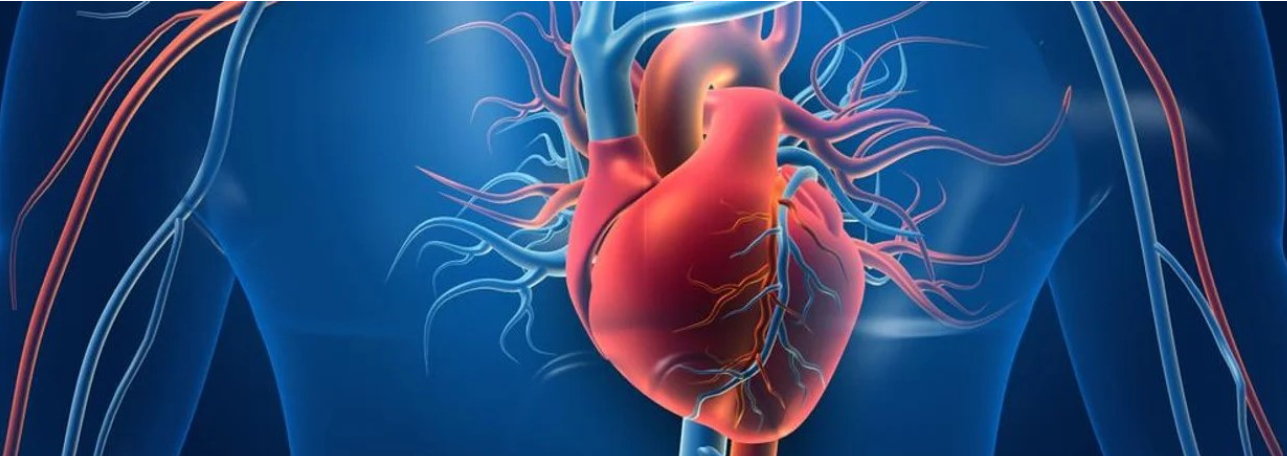

# **Project Summary -**

Write the summary here within 500-600 words.

Information about the patients is provided from the **Cardiovascular Risk Prediction dataset**. Data from *3,390 people* are included in the dataset along with **16 predictor factors and 1 target variable**. Each variable (attribute) carries the possibility of being significant. Risk factors include those related to **demographics, behaviour, and health.** To estimate the 10-year risk of getting coronary heart disease was our goal (CHD).

The most prevalent form of heart disease, **coronary heart disease (CHD), claims the lives of over 382,820 people each year**. In the US, heart disease claims the lives of about** 697,000 people annually**, or *1 in 5 deaths*.

I followed following steps:

1. I began by mounting the drive, **importing the required libraries**, and saving the data in variables in order to gain insightful conclusions. The next phase was **data analysis and visualisation**, where I used univariate, bivariate, and multivariate plots to assess our data distribution using a "UBM rule"*. I made an effort to extract "valuable insights" from the dataset using several graphs.

2. After comprehending the **data and obtaining variables**, we first **collected and cleaned the data, managed the null values** by examining the **distribution and outliers in the data**, and typecast the necessary features into the necessary format in order to correctly depict them. We conducted extensive **EDA and plotted various graph** types by categorising them into **univariate, bivariate, and multivariate categories** as a result, We discovered some significant insights that helped us to make future judgements in ML model pipeline.

3. Then, **utilising feature engineering and data preprocessing**, we were able to extract new features such as pulse pressure and glucose diabetes with the aid of other factors that did not directly affect** tenYearCHD**. Using the aid of **various inflation factors,** we additionally attempted to obtain some influencing aspects by **eliminating multicollinearity** within the **independent variables (VIF)**. We have not dealt with outliers in this dataset because doing so can result in the loss of crucial data and skewed findings. Also, we observed that some of the features had a categorical aspect, and the ML model is unable to comprehend the language of alphabets (strings). In order to convert them to numbers, **we used BINARY LABEL ENCODING.**

4. I "divided" the data into **train (80%) and test (20%)** halves to put into various algorithms. I also used *MinMaxScaler to make sure that all features were scaled similarly. I utilised SMOTE* to construct a **balanced set of data** because our data was so severely unbalanced.

5. The next stage was to train a model using several methods; I attempted different models, including the **LogisticRegression, SVM, Naive Bayes,DecisionTree	,KNN, RandomForest, AdaBoost, XGboost.** Due to the significant cost of False Negatives in a dataset from the medical industry, I chose **"Recall", "F1 score" as the model metric while choosing the most effective machine learning model**. 

6. **XGboost Classifier produced the best results both before and after cross-validation and hyper-parameter adjustment. XGboost Classifier is the model I've decided is the best fit for this particular dataset.**

Overall, we used a **combination of data processing, machine learning, and model evaluation skills** when developing a machine learning model using cardiovascular risk prediction data. Although it was a difficult task and we had some setbacks, with the appropriate strategy and information, we were able to develop a model that can reliably identify a patient who may have CHD in the future.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/vks2268/Cardiovascular-Risk-Prediction

# **Problem Statement**


## The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict wheater the patient has a 10- year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attributes is a potential risk factor. There are both demographic, behaviroal, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

     
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,f1_score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df_cv = pd.read_csv("/content/drive/MyDrive/Capstone project 3_classification/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df_cv.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
df_cv.head().T

0      1      2      3      4
id                   0      1      2      3      4
age                 64     36     46     50     64
education          2.0    4.0    1.0    1.0    1.0
sex                  F      M      F      M      F
is_smoking         YES     NO    YES    YES    YES
cigsPerDay         3.0    0.0   10.0   20.0   30.0
BPMeds             0.0    0.0    0.0    0.0    0.0
prevalentStroke      0      0      0      0      0
prevalentHyp         0      1      0      1      0
diabetes             0      0      0      0      0
totChol          221.0  212.0  250.0  233.0  241.0
sysBP            148.0  168.0  116.0  158.0  136.5
diaBP             85.0   98.0   71.0   88.0   85.0
BMI                NaN  29.77  20.35  28.26  26.42
heartRate         90.0   72.0   88.0   68.0   70.0
glucose           80.0   75.0   94.0   94.0   77.0
TenYearCHD           1      0      0      1      0

In [ ]:
df_cv.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_cv.shape

(3390, 17)

Here 2390 rows and 17 columns in the dataset

### Dataset Information

In [ ]:
# Dataset Info
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df_cv.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
df_cv.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_cv.duplicated().sum()

0

So there is not any deplicate values in this dataset. 

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_cv.isnull().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

Here we got the missing values as follow:

Glucose = 304

education = 87

BPmeds = 44

totchol = 38

cigsPerDay = 22

BMI = 14

id =1

<Axes: >

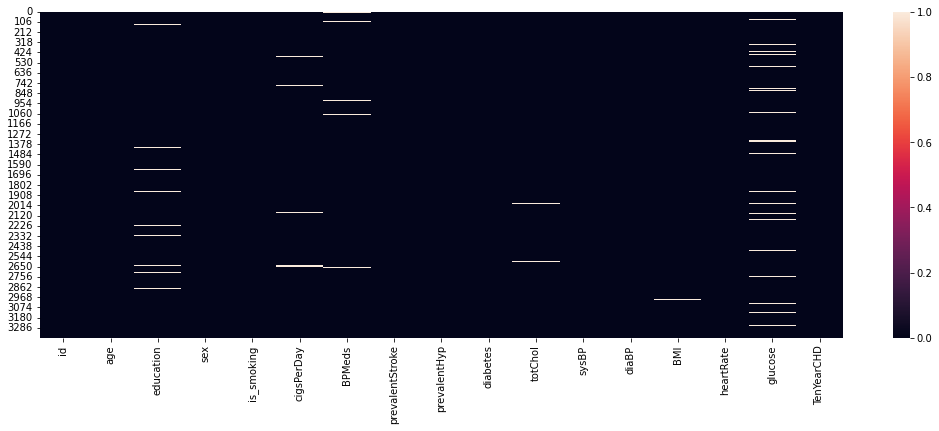

In [ ]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(df_cv.isnull(),cbar=True)   

In [ ]:
round(df_cv.isna().sum().sort_values(ascending = False)/len(df_cv)*100, 2)

glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64

### What did you know about your dataset?

Answer Here

Of the 17 columns in the missing values visualisation shown above, 4 columns have no values. Education, BPMeds, total Chol, and Glucose are examples of columns with null values. The Glucose columns have the highest amount of missing values (304).



> **The dataset contain the 3390 rows and 17 columns.**

> **Approx 9% missing values in the glucose.**

> **In Education colum there is 2.57% of missing values.**






**We will replace the missing value with the using of median**

In [ ]:
# Replace this null/missing values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df_cv[col] = df_cv[col].fillna(df_cv[col].median())

In [ ]:
df_cv.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

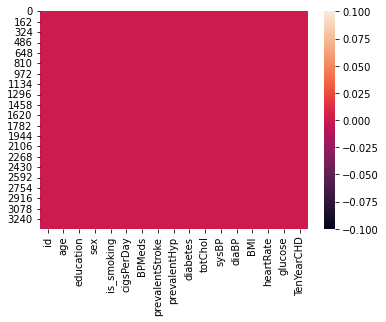

In [ ]:
sns.heatmap(df_cv.isnull())

## ***2. Understanding Your Variables***

Variables and their significance are crucial to any machine learning model. As a result, the step "Understanding Your Variables" is one of the most crucial. In this kind of data exploration, we look at the numerical columns, look at the variable descriptions, and generally try to learn more about our variables and data.

In [ ]:
# Dataset Columns
df_cv.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df_cv.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3390.0     1.971681    1.005925    1.00    1.00     2.00   
cigsPerDay       3390.0     9.010619   11.862839    0.00    0.00     0.00   
BPMeds           3390.0     0.029499    0.169224    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3390.0   237.039823   44.994205  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3390.0    25.793251    4.107026   15.96   23.03    25.38   
heartRate        3390.0    75.976991   11.970114   45.00   68.00    75.00   
glucose          3390.0    81.720059   23.161265   40.00   72.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                       75%     max  
id               2541.7500  3389.0  
age                56.0000    70.0  
education           3.0000     4.0  
cigsPerDay         20.0000    70.0  
BPMeds              0.0000     1.0  
prevalentStroke     0.0000     1.0  
prevalentHyp        1.0000     1.0  
diabetes            0.0000     1.0  
totChol           264.0000   696.0  
sysBP             144.0000   295.0  
diaBP              90.0000   142.5  
BMI                27.9975    56.8  
heartRate          83.0000   143.0  
glucose            85.0000   394.0  
TenYearCHD          0.0000     1.0

Because there is such a big discrepancy between the 75% percentile value and the highest value, there is skewness and outliers in the continuous characteristics "cigsperday," "totchol," "sysbp," "diebp," "BMI," "heartrate," and "glucose," as can be seen in the statistical summary.

In [ ]:
df_cv.describe(include = 'all').T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3390.0    NaN  NaN   NaN    1.971681    1.005925    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3390.0    NaN  NaN   NaN    9.010619   11.862839    0.0   
BPMeds           3390.0    NaN  NaN   NaN    0.029499    0.169224    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3390.0    NaN  NaN   NaN  237.039823   44.994205  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3390.0    NaN  NaN   NaN   25.793251    4.107026  15.96   
heartRate        3390.0    NaN  NaN   NaN   75.976991   11.970114   45.0   
glucose          3390.0    NaN  NaN   NaN   81.720059   23.161265   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.03   25.38  27.9975    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            72.0    78.0     85.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description 

**Demographic**:

• **Age:** The patient's age; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• **Sex:** either a man or woman ("M" or "F")

• **Education:** The individual's educational history (1,2,3,4)

**Medical history:**

• **BP Meds:** whether or not the patient was taking any (Nominal)

• **Prevalent Stroke:** the existence of prior strokes in the patient (Nominal)

• **Prevalent Hyp:** whether the patient had high blood pressure (Nominal)

• **Diabetes:** the presence or absence of diabetes in the patient (Nominal)

**Behavioral:**

• **is smoking:** Indicates if the patient currently smokes or not ("YES" or "NO")

• **Cigs Per Day:** The average number of cigarettes smoked by an individual each day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Current Medical Issues:**

• **Tot Chol:** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose:** glucose level (Continuous)

**Target Variable:**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)



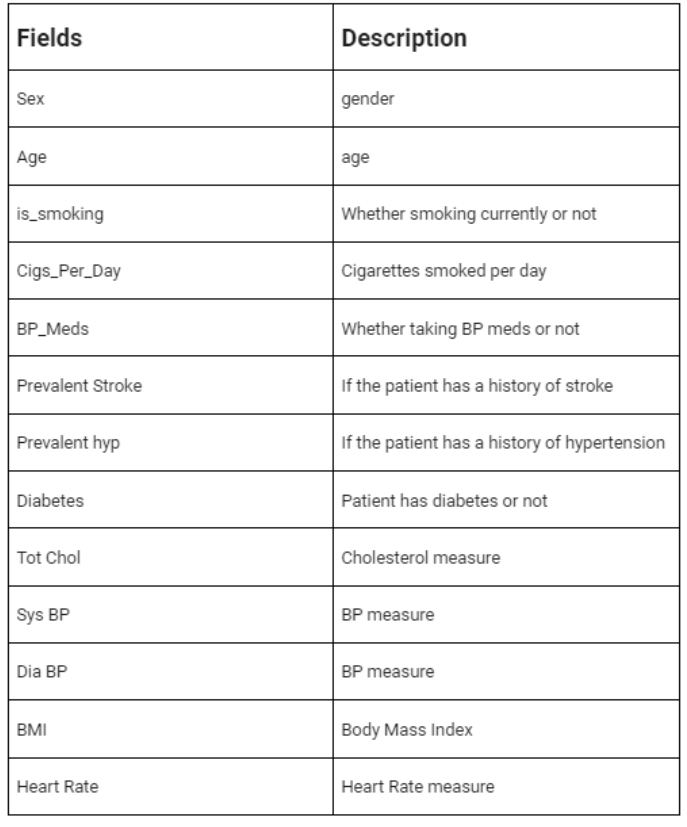

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_cv.columns.tolist():
  unique_val = df_cv[i].nunique()
  print("Number of unique values in ",i,"is",unique_val)

Number of unique values in  id is 3390
Number of unique values in  age is 39
Number of unique values in  education is 4
Number of unique values in  sex is 2
Number of unique values in  is_smoking is 2
Number of unique values in  cigsPerDay is 32
Number of unique values in  BPMeds is 2
Number of unique values in  prevalentStroke is 2
Number of unique values in  prevalentHyp is 2
Number of unique values in  diabetes is 2
Number of unique values in  totChol is 240
Number of unique values in  sysBP is 226
Number of unique values in  diaBP is 142
Number of unique values in  BMI is 1259
Number of unique values in  heartRate is 68
Number of unique values in  glucose is 132
Number of unique values in  TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df_cv.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
#droping the unnecessary columns
df_cv.drop(['id'] , axis = 1,inplace= True)

In [ ]:
#Now we seperated our Categorical and Numerical data

categorical_data = [i for i in df_cv.columns if df_cv[i].nunique()<=4]
categorical_data

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
numerical_data = [i for i in df_cv.columns if i not in categorical_data]
numerical_data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
#There is a 10-year chance of developing coronary heart disease (CHD) for the whole patient count or not.
df_cv['TenYearCHD'].value_counts().reset_index()

index  TenYearCHD
0      0        2879
1      1         511

TenYearCHD is the dependent variable in this case, and it is obvious that our data is unbalanced because only **16% (511/3390)** of the total dataset falls into the**"1" or "Yes" category**, while the remaining **2879/3390 fall into the "0" or "No" category**. When constructing a model for this, we can run into several challenges.

In [ ]:
age_num = df_cv['age'].value_counts().reset_index()
print(f"maximum age in the age columns is = {age_num['index'].max()}")
print(f"Minmum age in the age columns is = {age_num['index'].min()}")
age_num 

maximum age in the age columns is = 70
Minmum age in the age columns is = 32


index  age
0      40  148
1      42  145
2      41  144
3      46  140
4      39  139
5      44  135
6      48  134
7      45  131
8      43  127
9      38  119
10     52  118
11     55  116
12     50  115
13     53  114
14     51  114
15     47  108
16     54  107
17     49  104
18     57   97
19     58   95
20     60   95
21     63   93
22     59   93
23     56   92
24     61   87
25     62   80
26     64   75
27     36   75
28     37   73
29     65   43
30     67   33
31     66   30
32     35   29
33     34   16
34     68   14
35     69    5
36     33    4
37     70    2
38     32    1

In [ ]:
# Now we do groupby of two numerical data i.e 'age' and 'cigsPerDay'
age_vs_cigsPerDay = df_cv.groupby(['age'])['cigsPerDay'].mean().reset_index()
age_vs_cigsPerDay

age  cigsPerDay
0    32   15.000000
1    33    5.000000
2    34    8.750000
3    35   10.758621
4    36    9.773333
5    37   13.027397
6    38   10.403361
7    39   11.345324
8    40   12.344595
9    41   10.909722
10   42   11.317241
11   43   12.023622
12   44   12.192593
13   45    9.358779
14   46   10.650000
15   47   12.935185
16   48    9.679104
17   49    8.826923
18   50    9.730435
19   51    9.763158
20   52    6.923729
21   53    8.333333
22   54    7.803738
23   55    5.551724
24   56    7.684783
25   57    6.453608
26   58    7.473684
27   59    7.548387
28   60    5.494737
29   61    5.367816
30   62    5.350000
31   63    5.989247
32   64    5.346667
33   65    1.558140
34   66    3.700000
35   67    4.787879
36   68    5.714286
37   69    1.000000
38   70    0.000000

In [ ]:
numerical_data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
 #Now we do groupby of numerical data i.e 'age' and 'cigsPerDay','totChol','sysBP'
age_wise_analysis = df_cv.groupby(['age'])['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'].mean()
age_wise_analysis

age  cigsPerDay     totChol       sysBP      diaBP        BMI  \
age                                                                   
32   32.0   15.000000  242.000000  111.000000  70.000000  29.840000   
33   33.0    5.000000  182.250000  128.125000  81.250000  24.275000   
34   34.0    8.750000  197.750000  112.687500  72.187500  23.345625   
35   35.0   10.758621  214.586207  120.241379  76.637931  24.045517   
36   36.0    9.773333  207.440000  119.620000  77.346667  25.206267   
37   37.0   13.027397  215.356164  119.513699  77.294521  25.129041   
38   38.0   10.403361  213.697479  120.298319  77.777311  25.082941   
39   39.0   11.345324  222.568345  122.215827  79.604317  24.775540   
40   40.0   12.344595  217.148649  123.152027  79.665541  25.260270   
41   41.0   10.909722  222.909722  124.840278  79.951389  25.626667   
42   42.0   11.317241  227.786207  122.331034  80.051724  25.190207   
43   43.0   12.023622  224.803150  125.397638  80.618110  25.162283   
44   44.0   12.192593  229.400000  127.937037  82.840741  25.934815   
45   45.0    9.358779  232.030534  126.339695  81.351145  25.384885   
46   46.0   10.650000  235.314286  127.664286  81.667857  25.387500   
47   47.0   12.935185  238.787037  130.800926  83.148148  25.252222   
48   48.0    9.679104  231.895522  130.716418  83.731343  25.750299   
49   49.0    8.826923  245.000000  131.461538  82.730769  25.047404   
50   50.0    9.730435  240.391304  133.269565  85.230435  25.913391   
51   51.0    9.763158  251.342105  132.969298  83.890351  25.726140   
52   52.0    6.923729  247.754237  133.173729  83.733051  26.566949   
53   53.0    8.333333  248.359649  138.017544  85.745614  26.014298   
54   54.0    7.803738  245.915888  137.570093  85.056075  26.125701   
55   55.0    5.551724  253.853448  136.663793  84.939655  26.837069   
56   56.0    7.684783  251.271739  138.396739  85.434783  26.181630   
57   57.0    6.453608  252.195876  139.613402  85.036082  26.695773   
58   58.0    7.473684  243.000000  142.289474  85.978947  25.807158   
59   59.0    7.548387  254.000000  144.951613  85.865591  26.500108   
60   60.0    5.494737  256.610526  145.447368  87.063158  26.063895   
61   61.0    5.367816  245.494253  147.942529  88.413793  26.917356   
62   62.0    5.350000  259.325000  145.962500  86.256250  26.878125   
63   63.0    5.989247  246.612903  146.736559  85.306452  26.613978   
64   64.0    5.346667  246.906667  144.246667  83.066667  26.021200   
65   65.0    1.558140  250.511628  149.744186  88.395349  26.481395   
66   66.0    3.700000  254.300000  158.750000  89.016667  28.085000   
67   67.0    4.787879  246.969697  150.378788  84.272727  26.765152   
68   68.0    5.714286  228.214286  139.642857  80.178571  27.157143   
69   69.0    1.000000  236.200000  144.200000  78.800000  22.854000   
70   70.0    0.000000  169.000000  139.500000  88.500000  28.580000   

     heartRate    glucose  
age                        
32   80.000000  88.000000  
33   73.000000  83.500000  
34   73.312500  80.500000  
35   75.068966  77.310345  
36   74.453333  78.346667  
37   75.041096  78.698630  
38   76.697479  77.453782  
39   75.848921  79.294964  
40   76.925676  79.033784  
41   75.409722  77.555556  
42   75.344828  76.862069  
43   77.826772  81.165354  
44   74.851852  80.400000  
45   75.564885  80.877863  
46   78.428571  81.014286  
47   75.990741  84.851852  
48   76.664179  78.917910  
49   74.769231  79.423077  
50   76.895652  82.008696  
51   76.166667  79.570175  
52   75.364407  89.254237  
53   77.754386  80.184211  
54   76.364486  82.654206  
55   74.543103  81.206897  
56   73.760870  86.010870  
57   76.391753  82.360825  
58   77.084211  85.621053  
59   75.225806  83.107527  
60   76.052632  81.968421  
61   76.218391  85.655172  
62   74.125000  92.912500  
63   74.301075  83.387097  
64   76.986667  83.093333  
65   74.744186  90.348837  
66   78.700000  88.033333  
67   76.242424  90.090909  
68   78.785714  84.857143  
69

In [ ]:
TenYearCHD_wise_analysis = df_cv.groupby(['TenYearCHD'])['age'].mean().reset_index()
TenYearCHD_wise_analysis

TenYearCHD        age
0           0  48.728031
1           1  54.129159

In [ ]:
TenYearCHD_wise_analysis = df_cv.groupby(['TenYearCHD'])['education'].mean().reset_index()
TenYearCHD_wise_analysis

TenYearCHD  education
0           0   1.993748
1           1   1.847358

### What all manipulations have you done and insights you found?

Answer Here. 

*   As most of our category features are binary in nature, their values fall between 0 and 1. (with a few exceptions). Each one has a different set of continuous and range values when it comes to the numerical aspects.
*   TenYearCHD is the dependent variable in this case, and it is obvious that our data is unbalanced because only 16% (511/3390) of the total dataset falls into the"1" or "Yes" category, while the remaining 2879/3390 fall into the "0" or "No" category. When constructing a model for this, we can run into several challenges.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory data analysis is the process of running preliminary checks on the data to look for different patterns. It aids in identifying data anomalies that are present. It is a well-defined technique to interpreting the data's story since it aids in comprehending the connections between various factors. Visualizations allow us to deduce how to handle missing values and transform variables as necessary.

#### Chart - 1

In [ ]:
df_cv.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
print(categorical_data)
print(numerical_data)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## Analysis and visulization of all data
## **Univarient analysys**

Univariate analysis investigates each variable (attribute) separately. There are two types of variables: category and numerical. It doesn't deal with causes or relationships because "Uni" means "one," and its primary goal is to describe, which implies that it gathers data, summarises that data, and looks for patterns in the data. For each sort of variable, there are several statistical and visualisation methods of inquiry. I've used the **histplot,countplot and distplot** in this case.

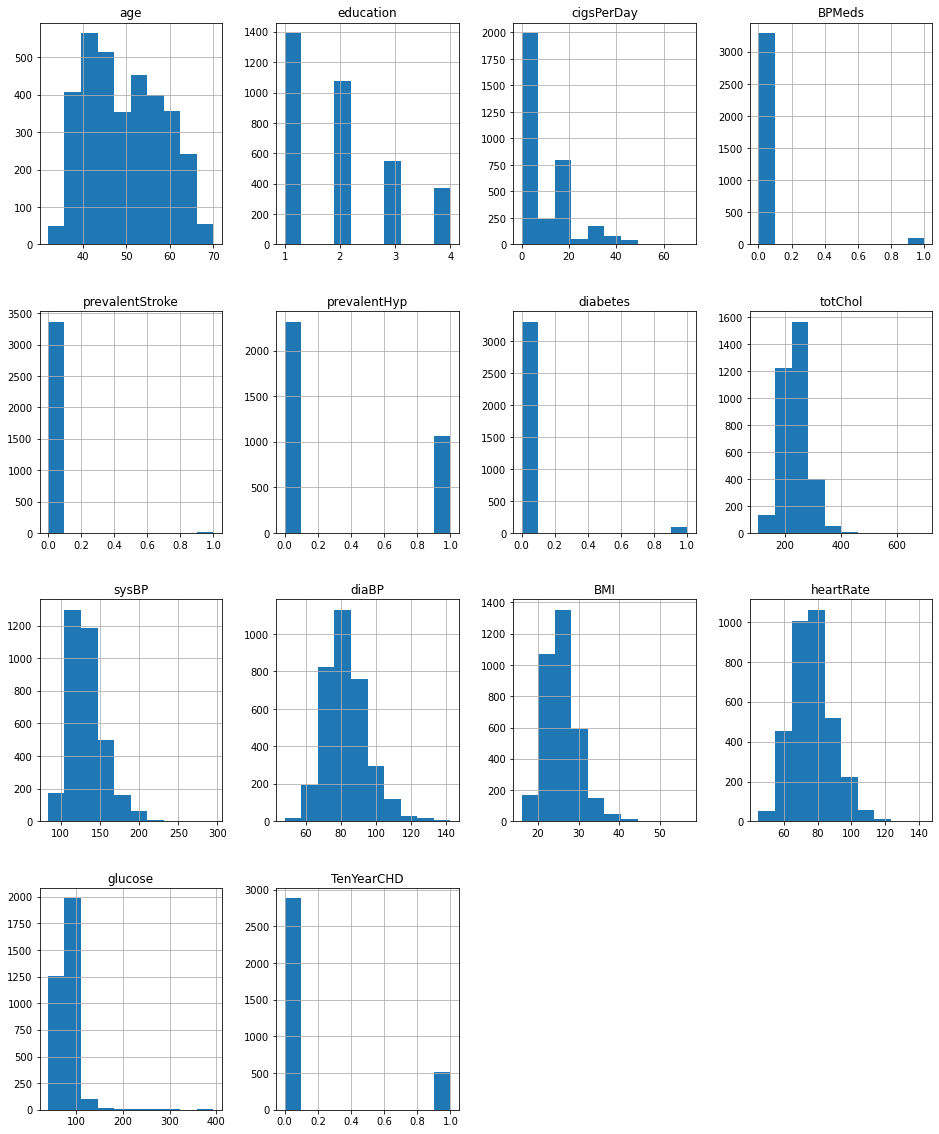

In [ ]:
# Chart - 1 visualization code
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
df_cv.hist(ax = ax)
plt.show()

##### 1. Why did you pick the specific chart?

To plot the histgram of all the dataset and check how is its frequency distribusion.

##### 2. What is/are the insight(s) found from the chart?

From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced.



#### Chart - 2 **data distribution visulization of numerical data**


In [ ]:
numerical_data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

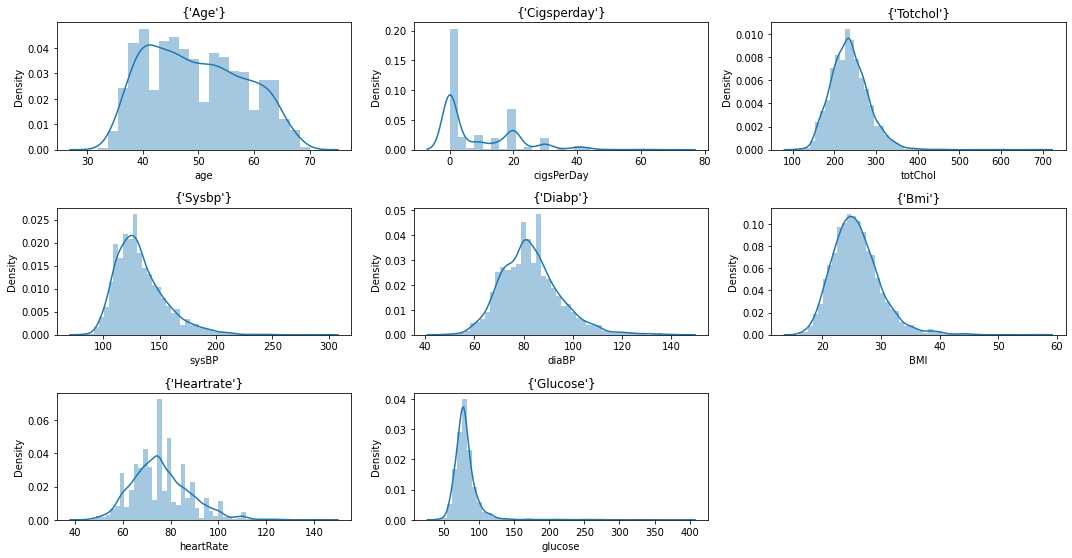

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
for n, col in enumerate(numerical_data[:]):
  plt.subplot(4,3, n+1)
  sns.distplot((df_cv[col]))
  plt.title({col.title()})
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

I decided to use a distplot to examine the distribution of numerical features.

##### 2. What is/are the insight(s) found from the chart?

I noticed that some of the numerical features, including totChol, sysBP, BMI, and glucose, are slightly right skewed from the distribution plot of numerical data shown above.


> Most glucose readings go below 150.

> Most totChol values—nearly 90%—fall between 50 and 400.

Answer Here

#### Chart - 3 Histrogram plot of numerical data

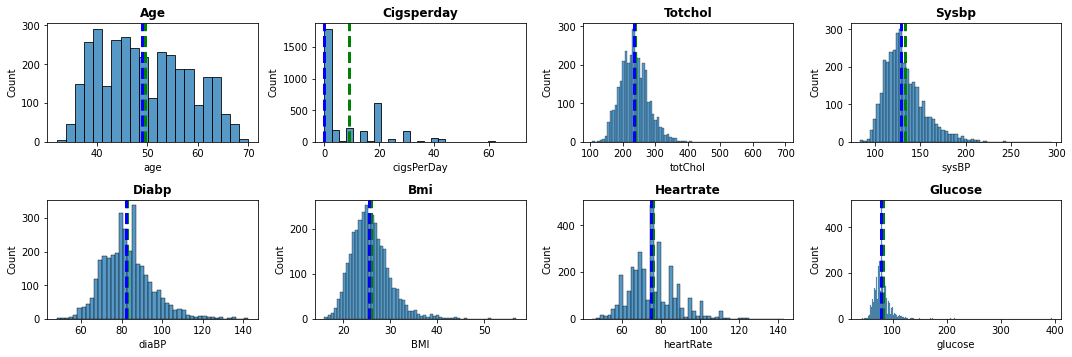

In [ ]:
# Chart - 3 visualization code
# we will visulize the mean and median
plt.figure(figsize=(15,12))
for n,column in enumerate(numerical_data):
  features_var = df_cv[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(features_var)
  ax.axvline(features_var.mean(), color='green', linestyle='dashed', linewidth=3)
  ax.axvline(features_var.median(), color='blue', linestyle='dashed', linewidth=3)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here we choosed the histrogram plot of the numerical data. and check its frequecy distribustion of the data.
Since data is typically presented in the form of certain groups, histograms have been used to show the distribution of columns containing numerical data. It is an accurate way for displaying the distribution of numerical data graphically. It is a type of bar plot where the X-axis shows the bin ranges and the Y-axis provides frequency information.

##### 2. What is/are the insight(s) found from the chart?

The revelations we made include:

The majority of the people in the sample are in their 40s to 60s, while there are a few who are under 30 or over 70.

The histogram can indicate that most people in the sample smoke less than 10 cigarettes per day, with a few people smoking more than 20 cigarettes per day.

Few people in the sample had total cholesterol levels below 160 mg/dL or above 300 mg/dL, however the bulk of people in the dataset have total cholesterol values between 200 and 250 mg/dL.

The majority of the people in the dataset have systolic blood pressure readings between 120 and 140 mmHg, with a small number of people having readings lower than 90 mmHg or higher than 160 mmHg.

Few people in the sample have diastolic blood pressure readings below 60 mmHg or beyond 100 mmHg, with the bulk of people having readings between 80 and 90 mmHg.

Few people in the sample had a body mass index below 18 or beyond 35, with the bulk of people in the dataset having a body mass index between 24-26.

Few people in the sample had heart rates below 50 beats per minute or beyond 100 beats per minute, however the bulk of people in the dataset have heart rates between 60 and 90 beats per minute.



#### Chart - 4 **Age distribution**

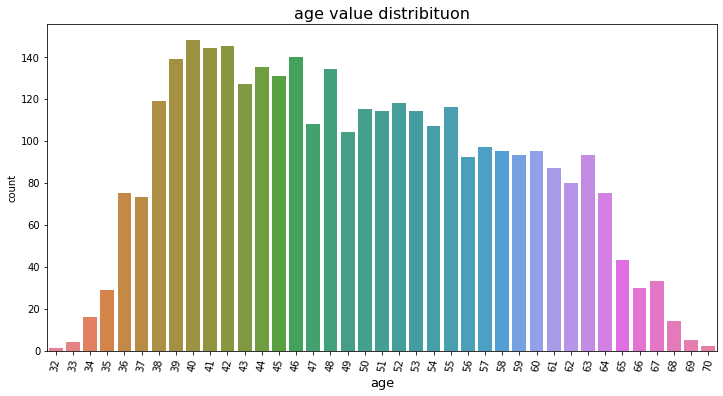

In [ ]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x= 'age', data=df_cv , palette='husl')
ax.set_xlabel( 'age' , size = 13 )
ax.set_title( 'age value distribituon' , size = 16 )
plt.xticks(rotation=80);


##### 1. Why did you pick the specific chart?

I have chosen the countplot to visualise how the age is distributed.



##### 2. What is/are the insight(s) found from the chart?

The majority of the information pertains to adults who are 38 to 46 years old.

Minimal data for ages 32 to 34 and 68 to 70 are provided.

#### Chart - 5

## **Analysis of categorical_data columns**

In [ ]:
categorical_data

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

## Education data visulize

Text(0.5, 1.0, 'education columns data distribution')

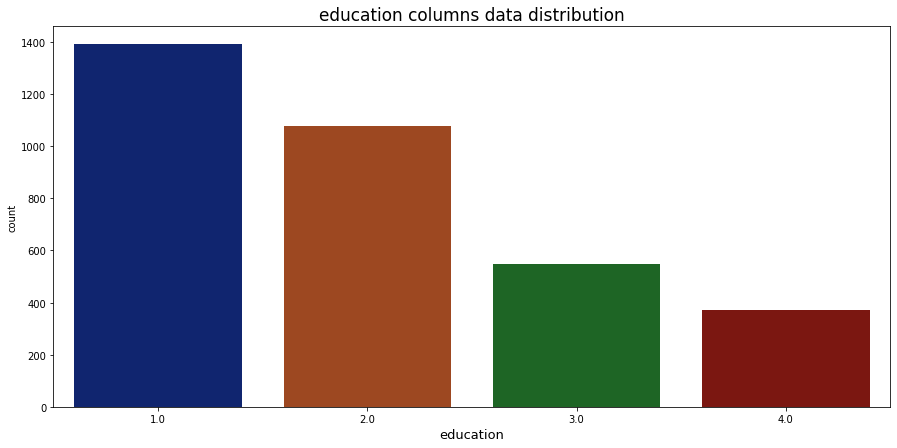

In [ ]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x= 'education' , data=df_cv , palette='dark')
ax.set_xlabel( 'education' , size = 13 )
ax.set_title( 'education columns data distribution' , size = 17 )

To show the distribution of educational attainment among those being assessed for their risk of cardiovascular disease, a donut chart has been drawn. Similar to a bar chart, this one has a few advantages and may be used to compare several categories or dimensions to the overall picture. We may compare various dimensions more easily using bar charts.

Education level 1 has more and least number has the education level 4

**TenYearCHD data distrubution**

Text(0.5, 1.0, 'Distribution of TenYearCHD')

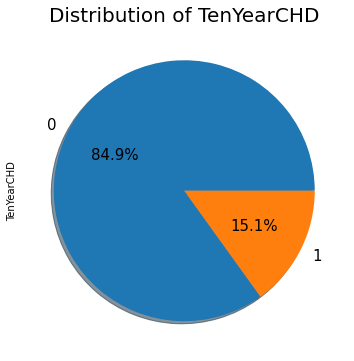

In [ ]:
plt.figure(figsize=(17,6))
df_cv['TenYearCHD'].value_counts().plot(kind='pie', autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

##### 1. Why did you pick the specific chart?

Took pie chart to compare two type of categorical data in the target variable in the percent form

##### 2. What is/are the insight(s) found from the chart?

Here  0 type has approx 84.9% but the 1 type has 15.1% data in this dataset of target variable.

#### Chart - 6  
## **Bivariate Analysis**


Compared to univariate analysis, bivariate analysis is a little more analytical. It seeks to make assessments of the two variables. To determine the link between two value sets, a single statistical analysis was utilised. In this instance, I have examined the relationships between several qualities and the target variable.

In [ ]:
df_cv.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**plot between numerical data vs TenYearCHD**

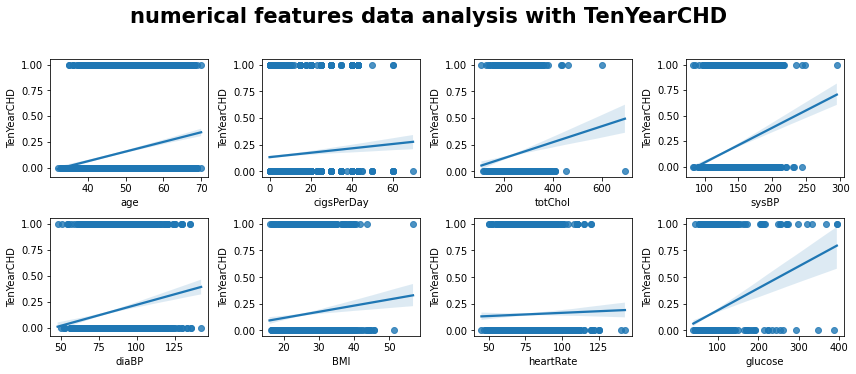

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,5))

plt.suptitle('numerical features data analysis with TenYearCHD', fontsize=21, fontweight='bold', y=1.03)

for i,col in enumerate(numerical_data):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=df_cv[col], y='TenYearCHD', data=df_cv)
  
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We used the above regression plot to demonstrate the link between numerical characteristics and the ten-year CHD. The main applications of regression plots include prediction, forecasting, time series modelling, and establishing the causal connection between variables.

##### 2. What is/are the insight(s) found from the chart?

Numerous Our goal variable and a number of independent numerical variables are connected and positively correlated.

#### Chart - 7 **plot between categorical features data vs TenYearCHD**




In [ ]:
categorical_data

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
categorical_data_cv = categorical_data[:-1]
categorical_data_cv 

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

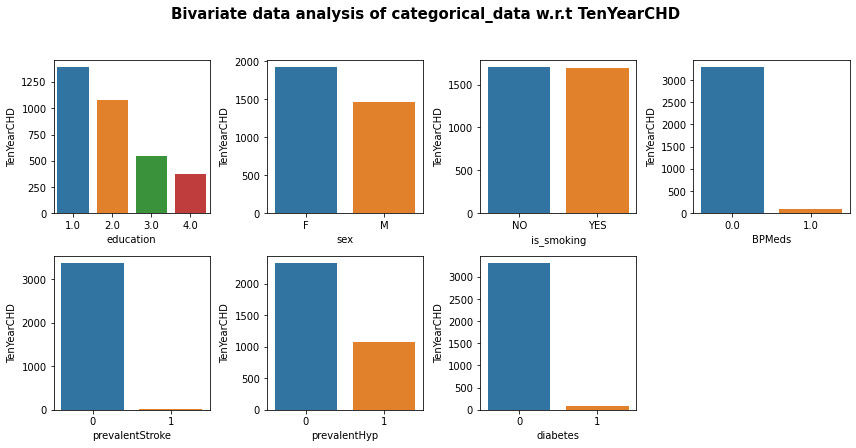

In [ ]:
# figsize
plt.figure(figsize=(12,6))
# title
plt.suptitle('Bivariate data analysis of categorical_data w.r.t TenYearCHD ', fontsize=15, fontweight='bold', y=1.03)

for i,col in enumerate(categorical_data_cv):       
  plt.subplot(2, 4, i+1)                                
  a = df_cv.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis labelling
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here we choosed the bar plot to ploting between TenYearCHD VS categorical data set. And it give the better understanding of the dataset which is categorical 

#### Chart - 8  **age group vs TenYearCHD**
(by checking which age group has more possibility of being attacked to CHD)

In [ ]:
df_cv.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

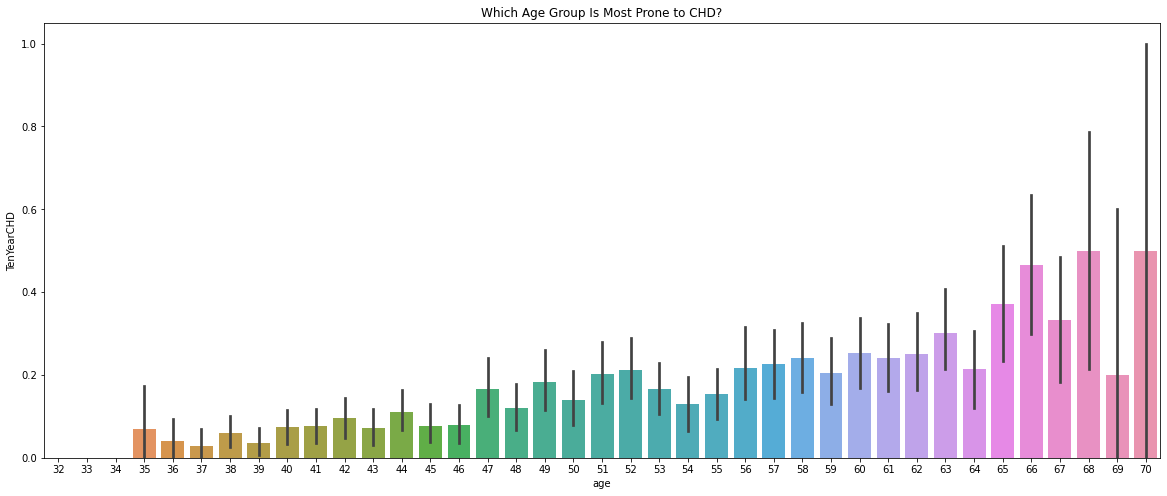

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(20,8))
sns.barplot(x='age', y='TenYearCHD', data=df_cv)
plt.title("Which Age Group Is Most Prone to CHD?")
plt.show()

##### 1. Why did you pick the specific chart?

In order to determine which age group is more susceptible to heart disease, we created an age-CHD Probability plot.

##### 2. What is/are the insight(s) found from the chart?

We can observe that the age column and cardiovascular risk are related. The likelihood of developing cardiovascular disease rises with age. Older persons (those above 65) are more susceptible to heart diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can target every person, independent of their health conditions and lifestyle choices, as age is a significant role in cardiovascular risk. It is possible to raise awareness, which will benefit the wellness of all businesses and people.

#### Chart - 9 **Smokers vs non-smokers count with their age column**

Text(0.5, 1.0, 'Smokers vs non-smokers count with age')

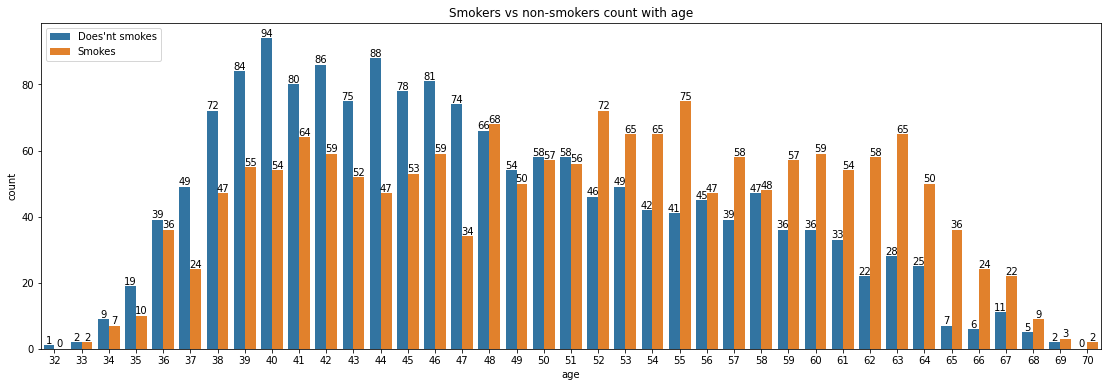

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(19,6))
ax= sns.countplot(x="age",hue="is_smoking",data=df_cv)
plt.legend(["Does'nt smokes",'Smokes'], loc=2)
for i in ax.containers:
      ax.bar_label(i)
plt.title('Smokers vs non-smokers count with age')


##### 1. Why did you pick the specific chart?

Here we choosed the countplot which give the count campare between age and smoker, non-smoker in a bar ploting.

##### 2. What is/are the insight(s) found from the chart?

As per the avove ploted graph we found that:

The count of Does't smokes people at the age of 40 is maximum i.e 94. 

But at the age of 55 smokes count is max like 75. 

#### Chart - 10 **multivariate Analysis**

**Check the Relation between Sex and CigsPerDAY with TenYearCHD**

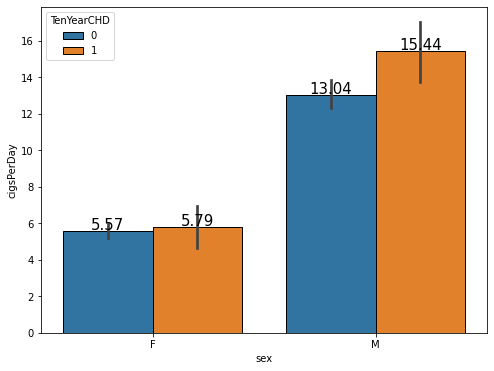

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,6))
plots=sns.barplot(x=df_cv['sex'],y=df_cv['cigsPerDay'],hue=df_cv['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.show()
     

##### 1. Why did you pick the specific chart?

As we know bar chart is beneficial when you are comparing segments of information, such as to compare different categorical or discrete variables thus we have used them to illustrate distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?

Males consume cigarettes in greater numbers than females.

Males who smoke more cigarettes are at an increased risk of developing heart disease, whereas females who smoke or don't smoke have almost similar risks of developing CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

People are equally at risk whether they smoke or not, so when a healthcare provider is promoting a particular health care service, such as insurance, regular checkup plans, or tests, they can raise awareness among non-smokers as well. This expands the customer base, provides protection for a larger population, and increases the provider's revenue.

#### Chart - 11 **Age vs numerical data variables with comparision to TenYearCHD**

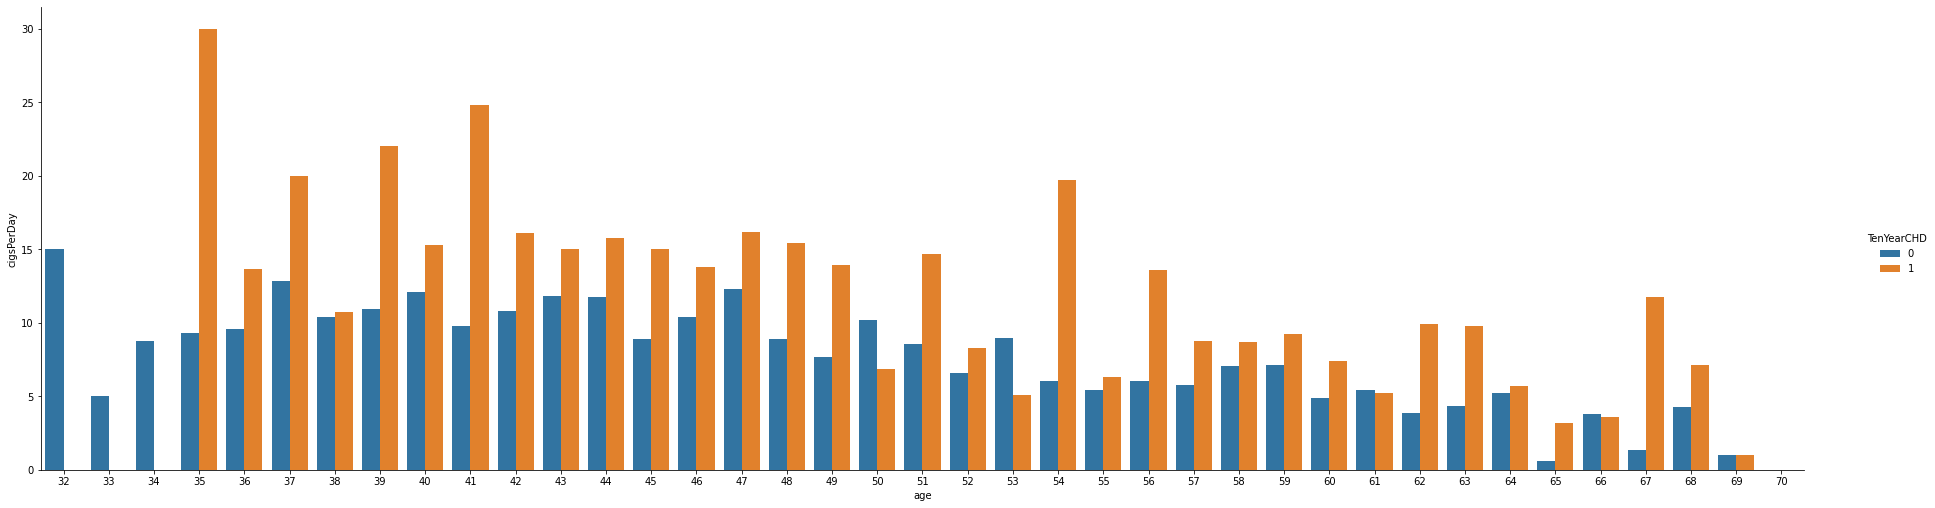

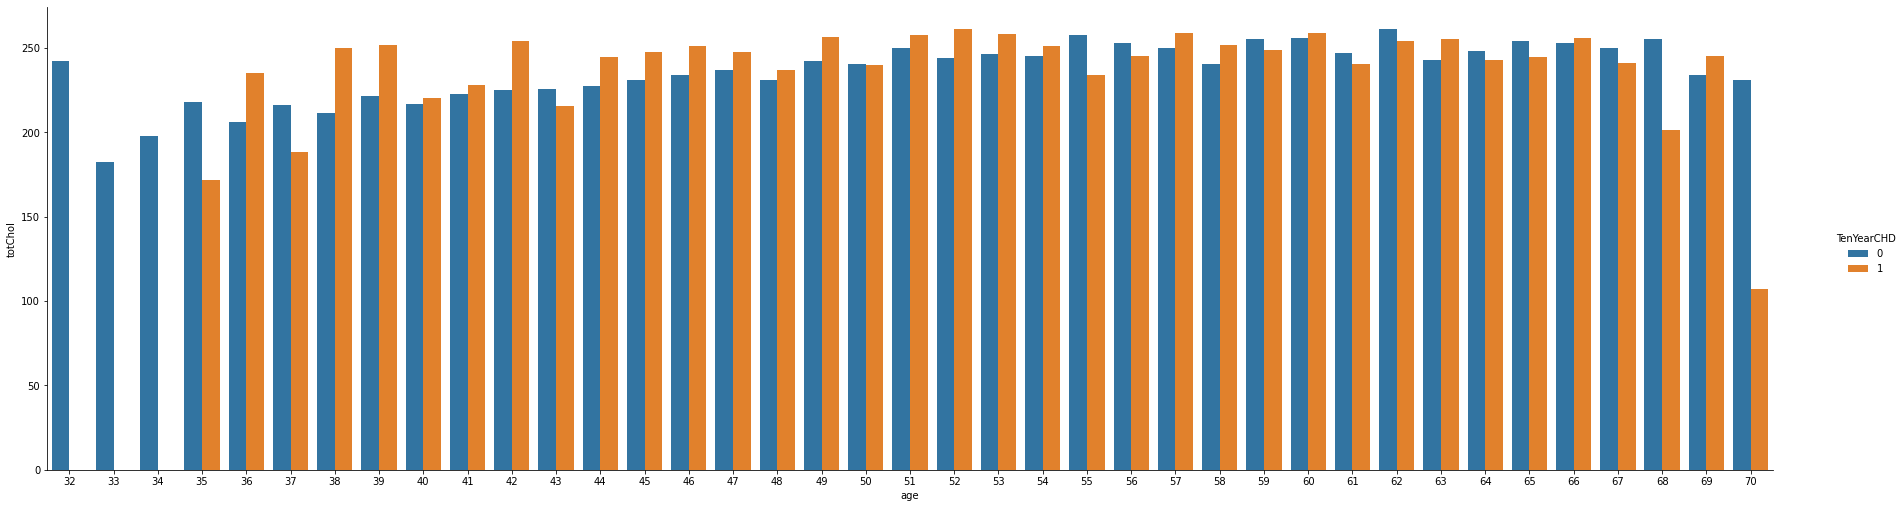

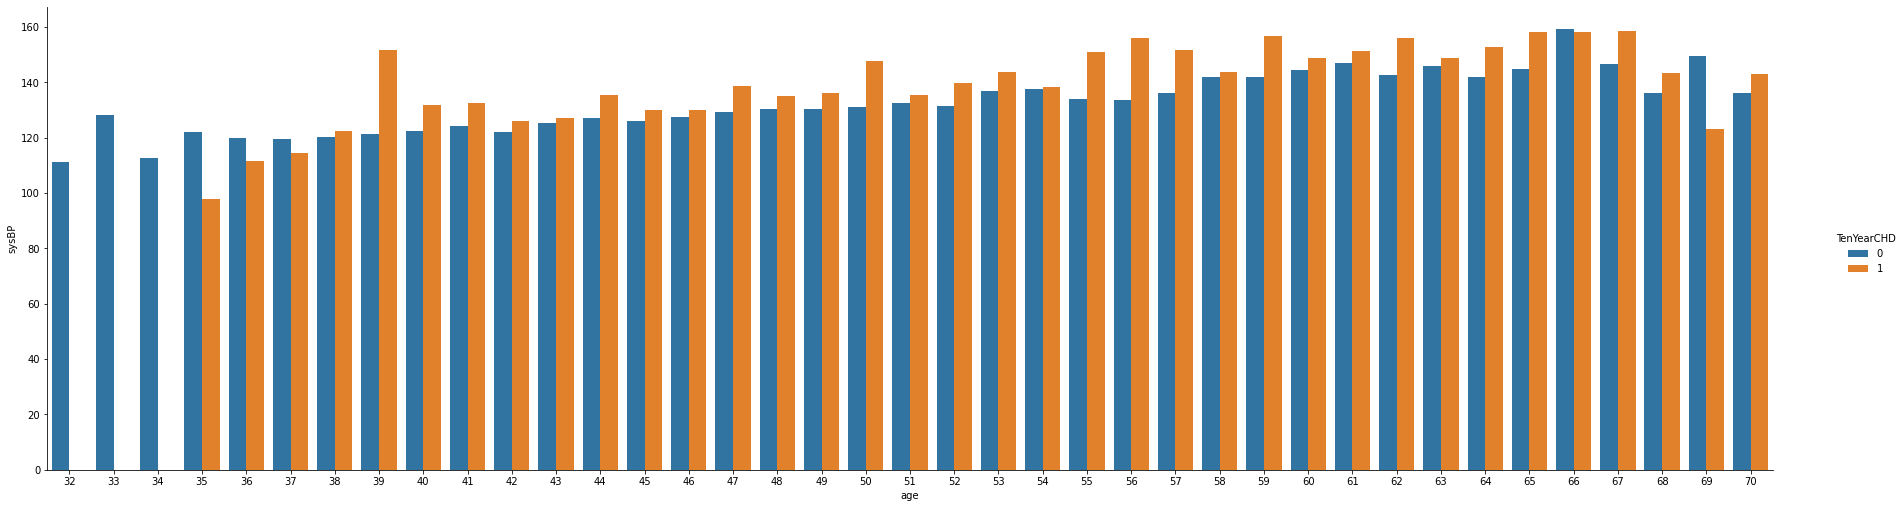

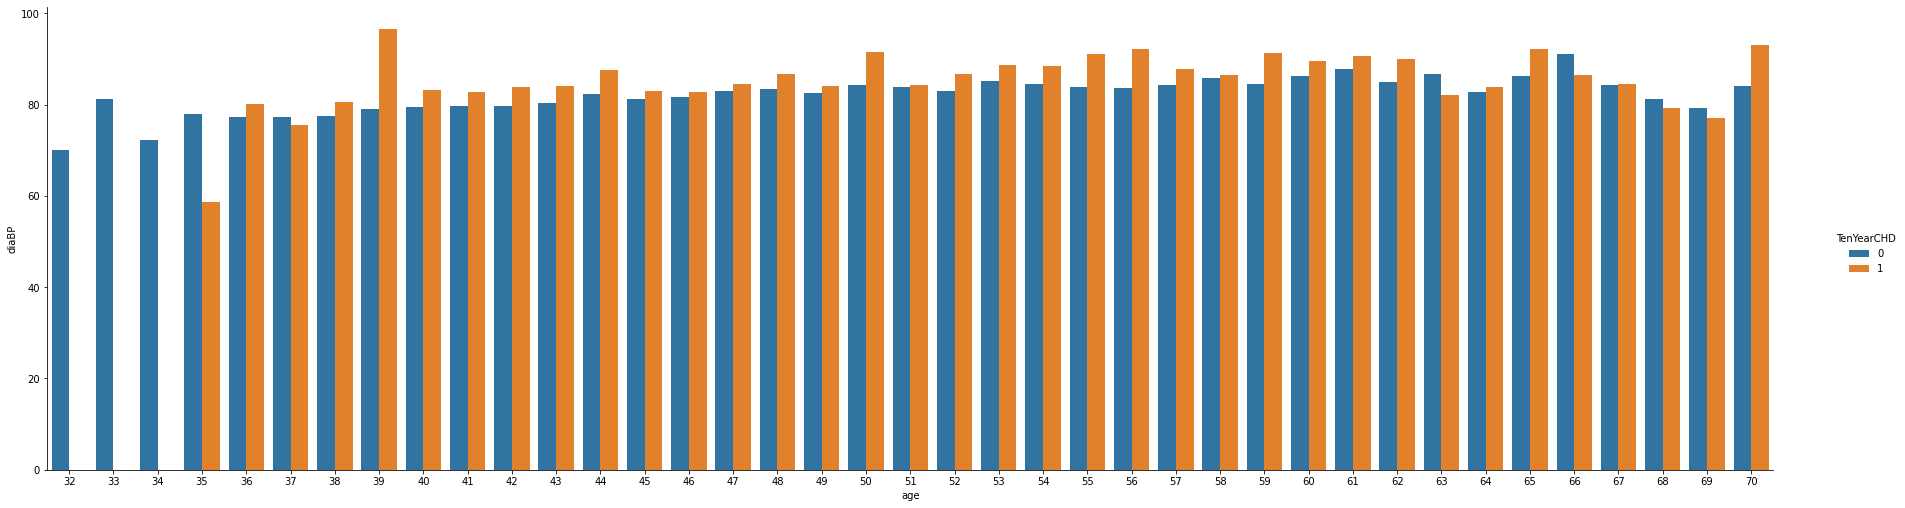

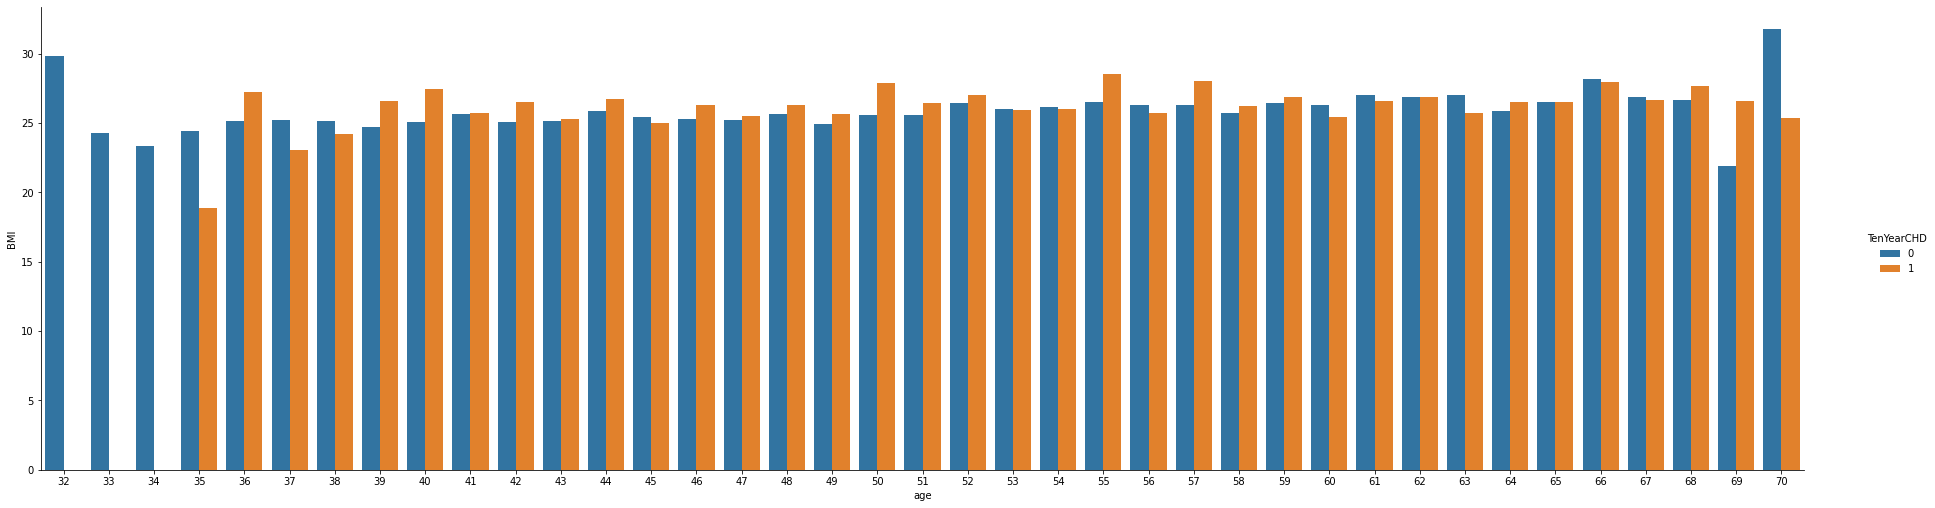

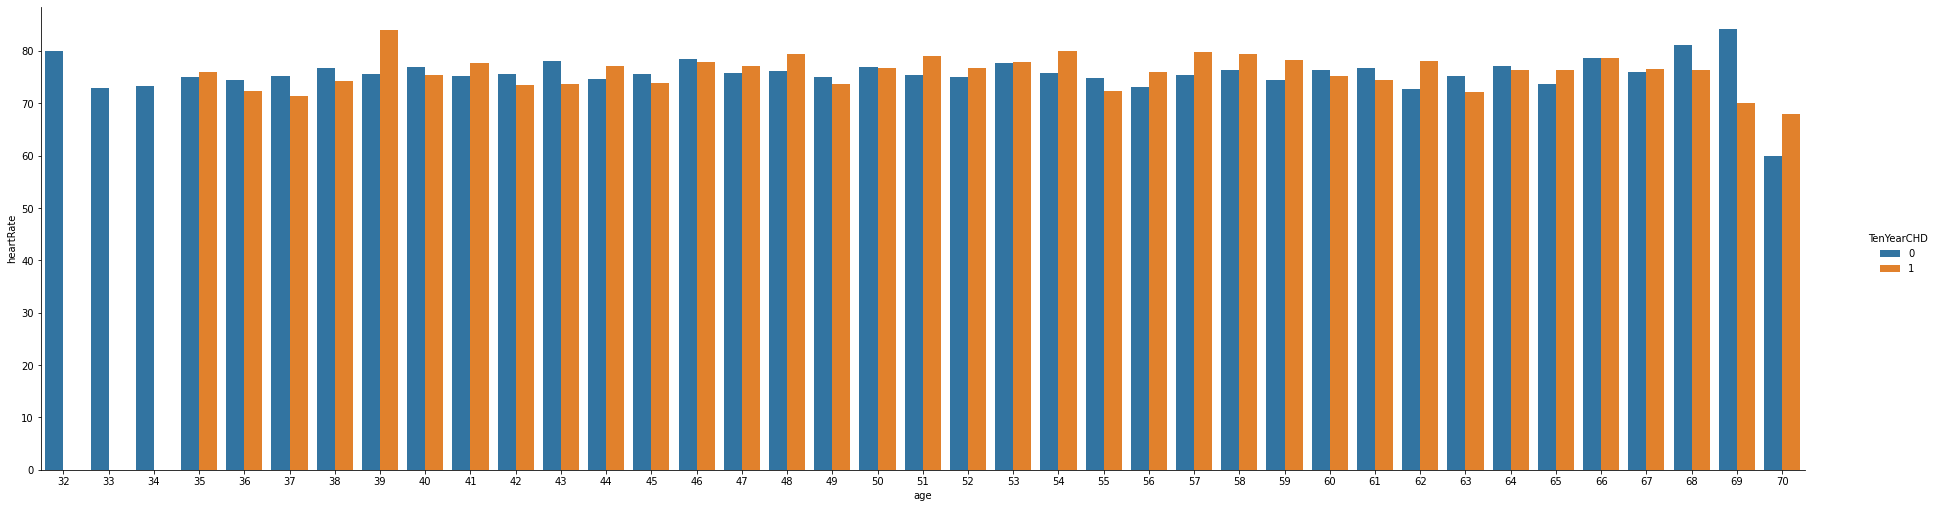

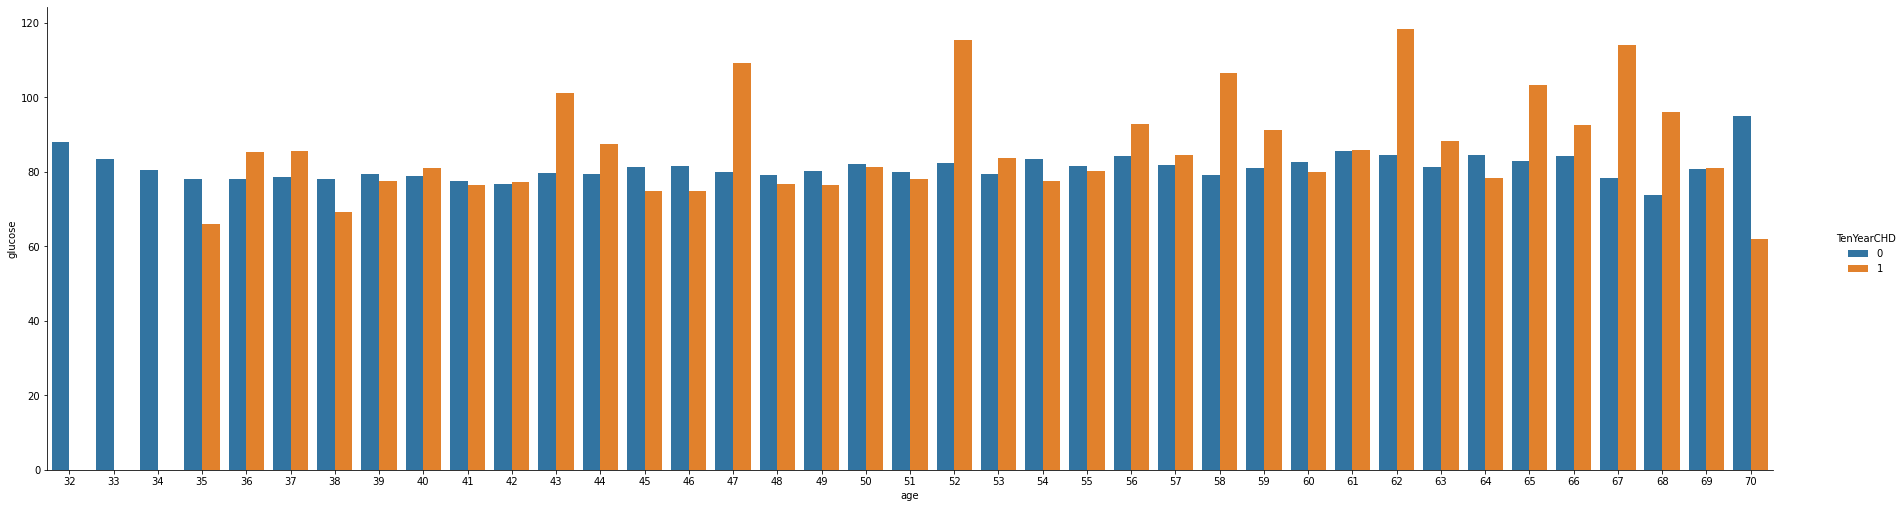

In [ ]:
# Chart - 11 visualization code
for i in numerical_data:
  if i!='age':
    ax= sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df_cv,legend=True , ci=None)
    ax.fig.set_size_inches(30,8)
    ax.fig.subplots_adjust(top=0.92,right=0.94)
    aa_ = ax.facet_axis(0, 0)
    for i in aa_.containers:
          labels = [f'{round(v.get_height(), 2)}' for v in i]


##### 1. Why did you pick the specific chart?

Here in this plot we use the cat plot which give the bar plot visulization.
It give the information about the age, TenYearCHD and all the numerical variable that will be in the bar plot.

##### 2. What is/are the insight(s) found from the chart?

When compared to those who are not at risk for CHD, persons at risk for CHD have somewhat higher cholesterol levels. They were also at risk for CHD at the age of 70, despite having a somewhat low level of cholesterol.

Systolic blood pressure, diastolic blood pressure, heart rate, and body mass index taken into account together for the overall result, we can say that everyone who is at risk has higher values for these measurements than those who are not at danger of CHD.

#### Chart - 12 **Correlation Heatmap**

<Axes: >

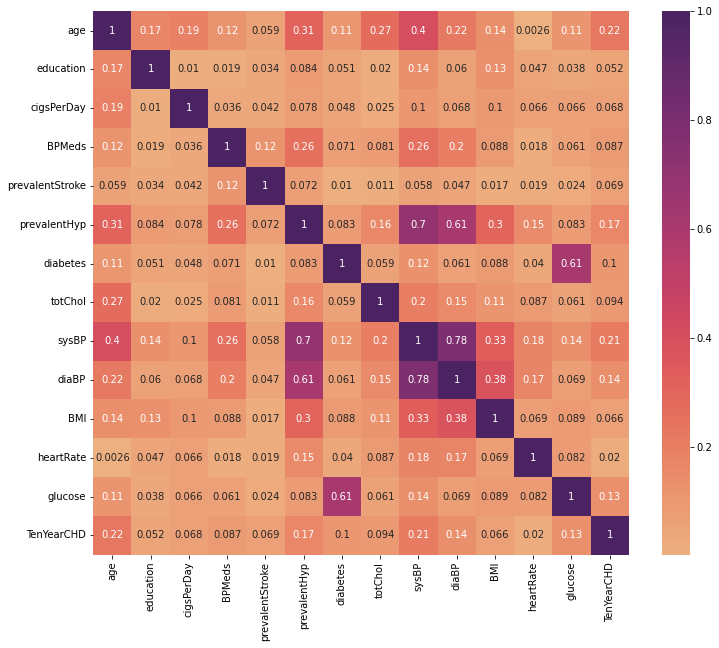

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (12,10))
correlation_data = df_cv.corr()
sns.heatmap(abs(correlation_data), annot=True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

Heat maps are the most effective way to display correlations. Heat Maps are used to help viewers focus on the parts of data visualisations that matter most by better visualising the volume of locations and events inside a dataset.

##### 2. What is/are the insight(s) found from the chart?

**We can notice a significant correlation between the following:**

sysBP and diaBP

prevalentHyp and diaBP

prevalentHypand sysBP

glucose and diabetes

**The following are weakly correlated:**

glucose and cigPerDay

BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education

BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay


#### Chart - 13-**Pair Plot**

In [ ]:
numerical_data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

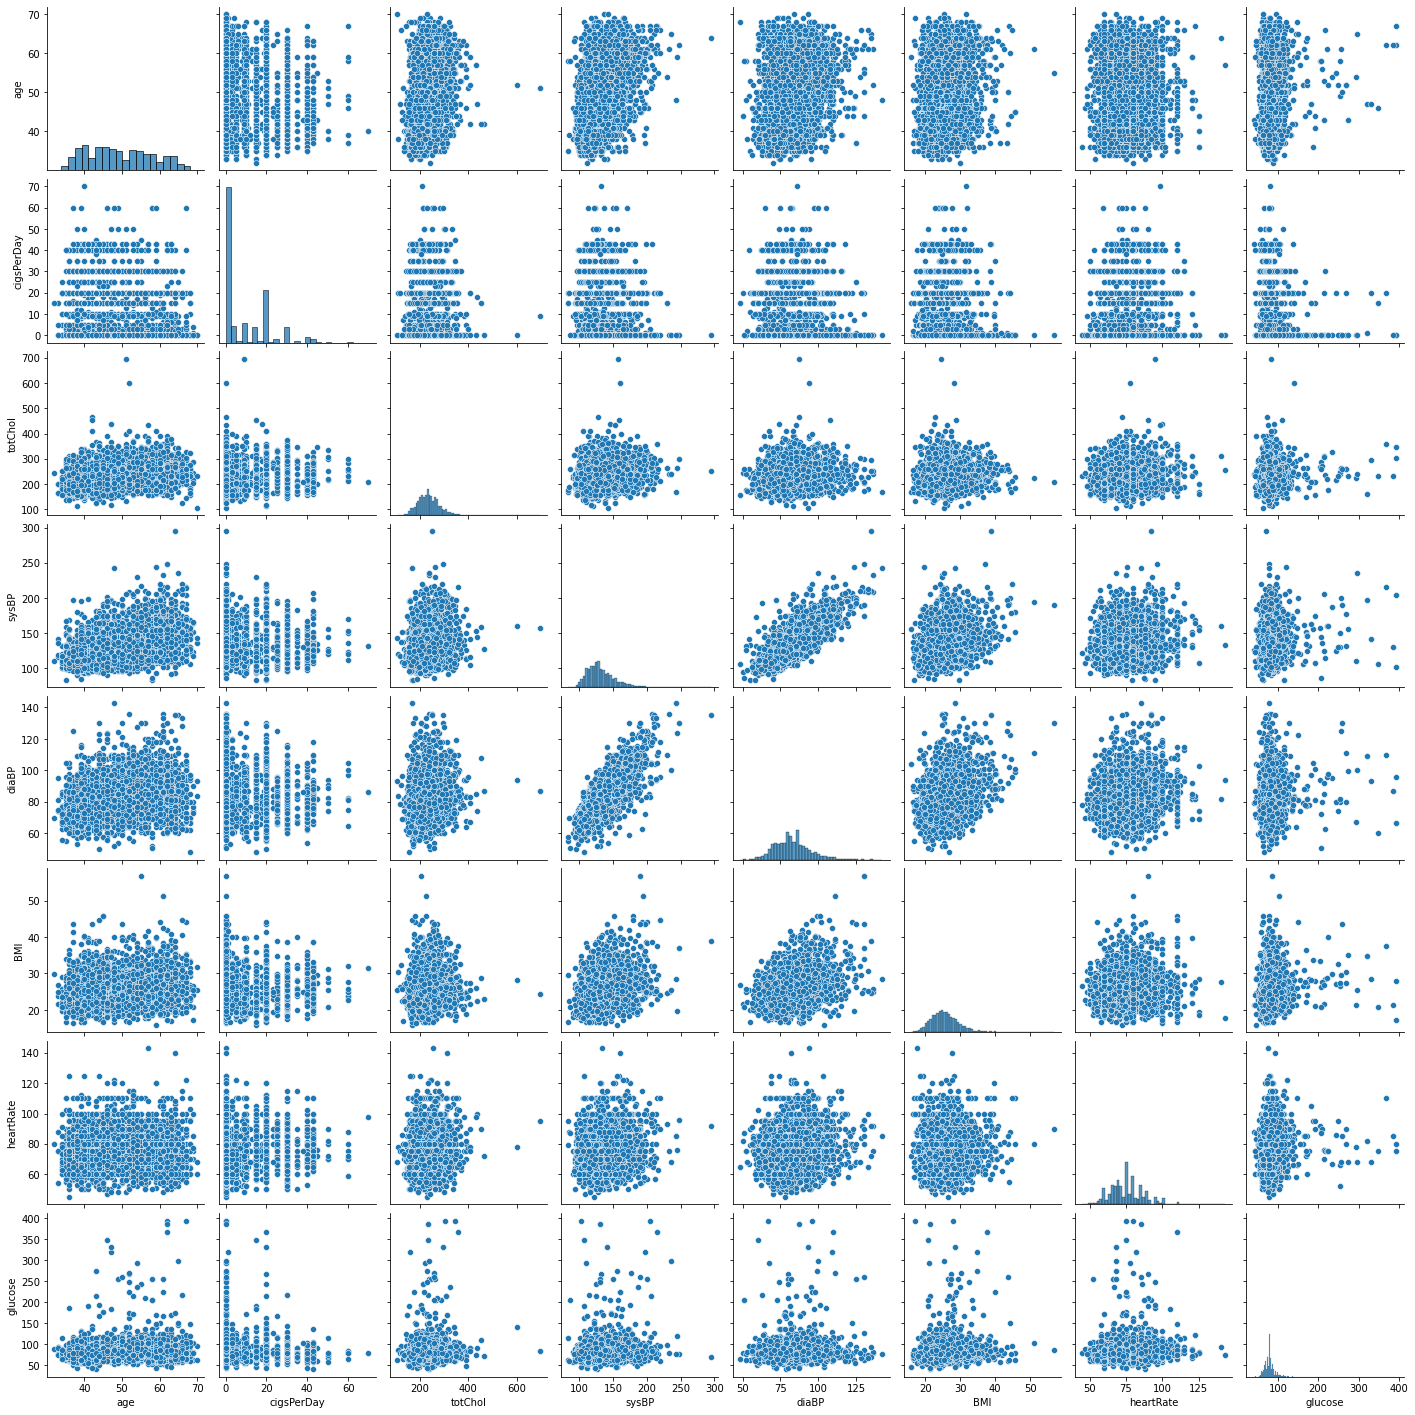

In [ ]:
# Chart - 13 visualization code
sns.pairplot(df_cv[numerical_data])


##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables.

##### 2. What is/are the insight(s) found from the chart?

Both SysBP and DiaBP have a "linear relationship," meaning that changing one forces a change in the other.

With a *maximum around 700*, TotChol is dispersed throughout the age column, which is quite high.

The majority of patients have glucose levels that are *less than 120*. It also has a bad correlation with the number of cigarettes per day.

The four categories are distributed approximately equally in terms of education.



## ***5. Hypothesis Testing***

By performing some statistical tests on a sample, the hypothesis testing method seeks to infer or reach a conclusion about the total population or set of data. Using sample data, hypothesis testing is done to verify our population observation inside the specified error range. By doing a hypothesis test, we may establish whether we have enough statistical data to draw a firm conclusion regarding the population hypothesis' truth or falsity.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average BP measure N= 132 among all age group

**Null Hypothesis: N = 132**

**Alternate Hypothesis : N < 132**

**Test Type: Z test**


In [ ]:
#Lets calculate the mean of sysBp
df_cv['sysBP'].mean()

132.60117994100295

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# t_test,p_value
#calculating p_value

import scipy.stats as stats
import statistics
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(df_cv['sysBP'],132)
print(round(p_value,4))

if p_value < 0.05:
  print("We are going to reject the null hypothesis i.e. Alternative hyphothesis accepted")

else:
  print("We have failed to reject the null hypothesis i.e. Alternative hyphothesis rejected")

0.1165
We have failed to reject the null hypothesis i.e. Alternative hyphothesis rejected


##### Which statistical test have you done to obtain P-Value?

A t-test is used to determine whether there is a significant difference that might be related to particular traits when comparing the means of two groups. The t-test is used as a technique to evaluate a hypothesis that concerns a population. The t-test takes into account degrees of freedom, t-distribution, and t-statistics to determine statistical significance. The t-test can be used to compare the means of two data sets to see whether they are representative of the same population.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(H0)** - mean of total cholestrol N= 237

**Alternative Hypothesis(H1)** - mean of total cholestrol N != 237

In [ ]:
#Lets calculate the mean of totChol
df_cv['totChol'].mean()

237.03982300884957

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,p_value = stests.ztest(df_cv['totChol'], x2=None, value=237)
print(float(p_value))

if p_value<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")
     

0.9589015715213028
failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Z-Test


##### Why did you choose the specific statistical test?

When data points are independent of one another and the data is regularly distributed, the Z-Test is typically used. The condition is true, hence the null hypothesis cannot be rejected.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - There is no relation between age and TenYearCHD

**Alternate Hypothesis** - There is a relationship between age and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
sample_one = df_cv["age"].sample(n=150, random_state=0)
sample_two = df_cv["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(sample_one, sample_two)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.229, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Together with the **Pearson Correlation Coefficient Value**, I used the **Pearson Correlation Test**. The test statistic used to determine the statistical association or relationship between two variables is called Pearson's correlation coefficient. Because it is based on the method of covariance, it is regarded as the best method for determining the relationship between variables of interest.

##### Why did you choose the specific statistical test?

The ideal approach is to use Pearson's Correlation constant to examine the linear correlation between the two variables. Its value, which ranges from -1 to 1, represents how strongly or weakly the two variables are connected. There is no relationship between the two variables, as indicated by the value "0". If the value of one variable rises, the value of the other variable rises as well, then there is a positive link between the two variables. If the value of one variable increases, the value of the other variable drops, indicating a negative relationship between the two variables.

Likewise in our situation, the coefficient value equals 0, showing a positive correlation between age and the ten-year CHD. We can therefore rule out the theory.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

above we have already handel the missing value and here is the print of all the missing value

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_cv.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here. i above we have already handle the missing value and here when we print the missing value then it gives the zero missing value in all the datasets columns

## **Treating Mis-filled Data**

now when we explore the dataset we observe that in the some placed data was misfilled because, in **is_smoking there will be YES** but in that columns part of **cigsPerDay will be 0.** So mean that person is smoking but there is 0 value of cigsperday. 

 So let's change such observations to '**No'.**

In [ ]:
# Smoking column reads "yes," although there were no cigarettes smoked.
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0)].head(10)
     

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422    55        1.0   F        YES         0.0     0.0                0   
466    45        3.0   M        YES         0.0     0.0                0   
469    42        1.0   M        YES         0.0     0.0                0   
491    61        1.0   F        YES         0.0     0.0                0   
538    41        1.0   F        YES         0.0     0.0                0   
767    54        1.0   M        YES         0.0     0.0                0   
1461   47        2.0   F        YES         0.0     0.0                0   
1467   49        1.0   F        YES         0.0     0.0                0   
1597   57        2.0   F        YES         0.0     0.0                0   
1986   49        2.0   F        YES         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
422              1         0    213.0  163.0   91.0  28.66       69.0   
466              1         0    170.0  145.5   99.0  26.74       83.0   
469              0         0    196.0  123.0   73.0  22.06       66.0   
491              1         0    356.0  168.0   98.0  27.30      103.0   
538              0         0    171.0  135.0   82.5  24.35       79.0   
767              0         0    219.0  110.0   72.0  26.05       95.0   
1461             0         0    365.0  127.0   76.0  24.44       72.0   
1467             0         0    252.0  123.0   69.0  21.45       72.0   
1597             0         0    229.0  115.0   69.0  24.43       80.0   
1986             1         0    233.0  158.0  102.0  25.31       90.0   

      glucose  TenYearCHD  
422      66.0           0  
466      85.0           0  
469      78.0           0  
491     106.0           0  
538      82.0           0  
767      86.0           0  
1461     80.0           0  
1467     89.0           0  
1597     93.0           0  
1986     72.0           0

In [ ]:
# Correcting the 'is_smoking' column to 'NO' where no cigarettes are smoked.
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [ ]:
#checking the data once again
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0)].head()

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

Here now that that give the zero result 

### 2. Handling Outliers

Outliers are frequently anomalous observations that distort the data distribution and are the result of inaccurate or inconsistent data entry. It's crucial to find and handle these outliers in order to guarantee that the trained model generalises correctly.

In [ ]:
print(categorical_data)
print(numerical_data)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


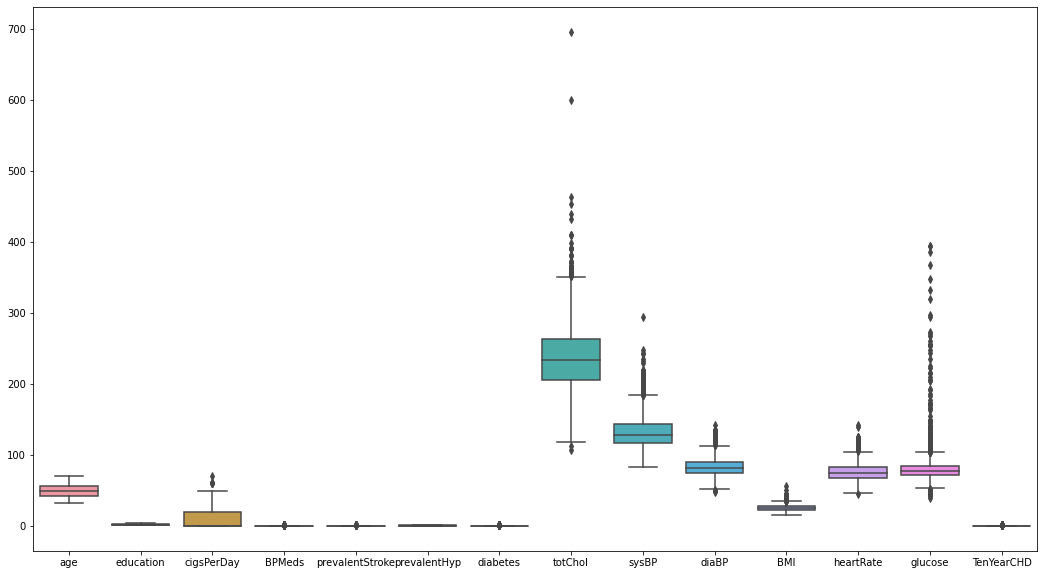

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(18,10))
# boxplot of the data features
sns.boxplot(data=df_cv)
plt.show()    
     

The columns for **cigarettesPerDay, totalChol, sysBP, diaBP, BMI, heartRate, and glucose** are where the outliers can be noticed. In order to verify that feature distributions have mean = 0 and std = 1, let's treat them using the **Z score treatment.**

In [ ]:
# Let's Handle the Outliers & Outlier treatments
def removal_outliers(df_cv,columns):
  
  plt.figure(figsize=(12,7))
  plt.subplot(1, 2, 1)
  plt.title('outliers before the treatment')
  sns.boxplot(df_cv[columns])
  plt.subplot(1, 2, 2)
  sns.distplot(df_cv[columns])

  #here use the z-score
  df_cv = df_cv[((df_cv[columns] - df_cv[columns].mean()) / df_cv[columns].std()).abs() < 3]
  df_cv = df_cv[((df_cv[columns] - df_cv[columns].mean()) / df_cv[columns].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('outliers after the treatment')
  sns.boxplot(df_cv[columns])
  plt.subplot(1, 2, 2)
  sns.distplot(df_cv[columns])

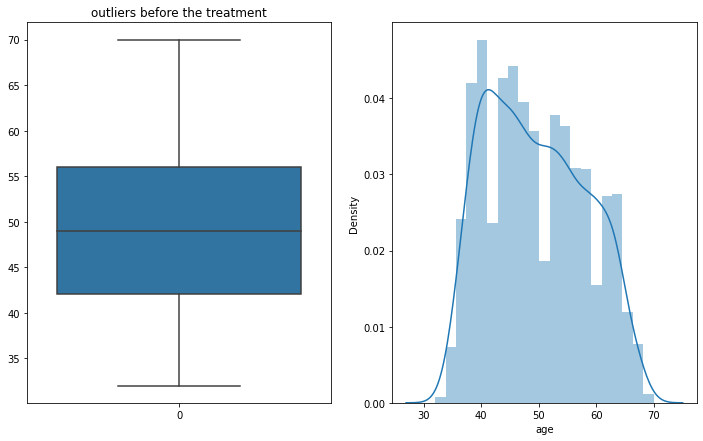

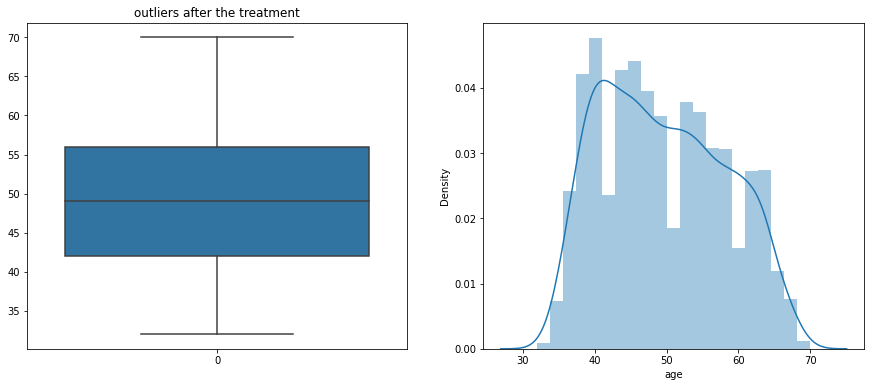

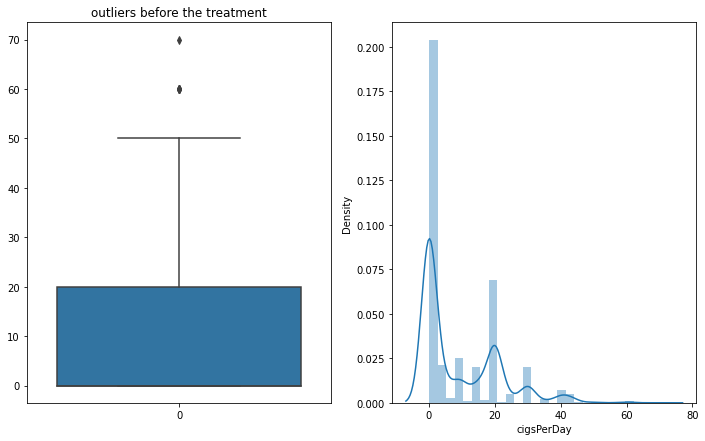

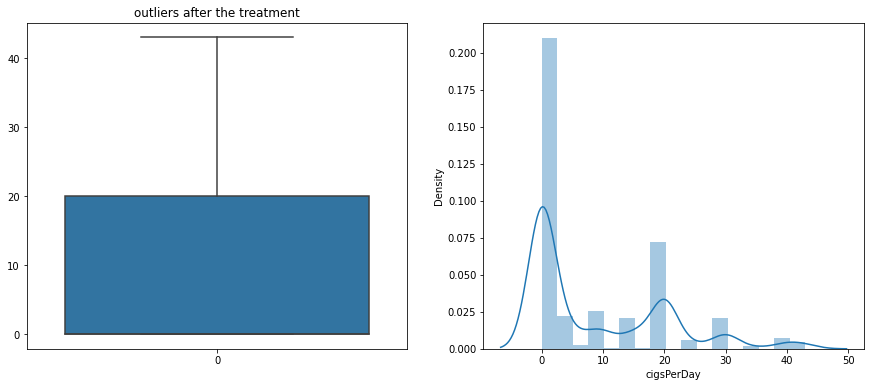

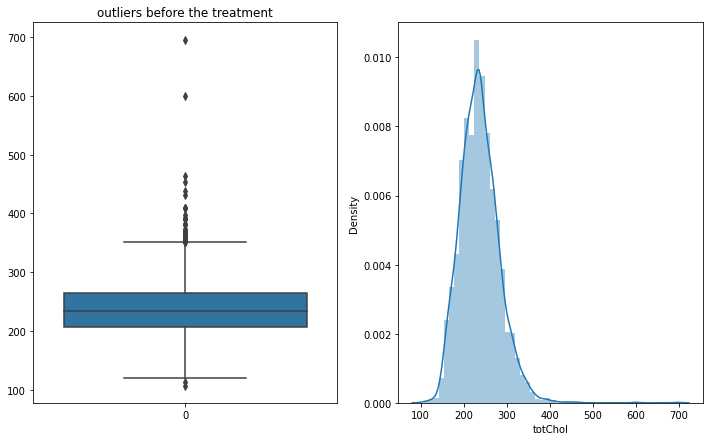

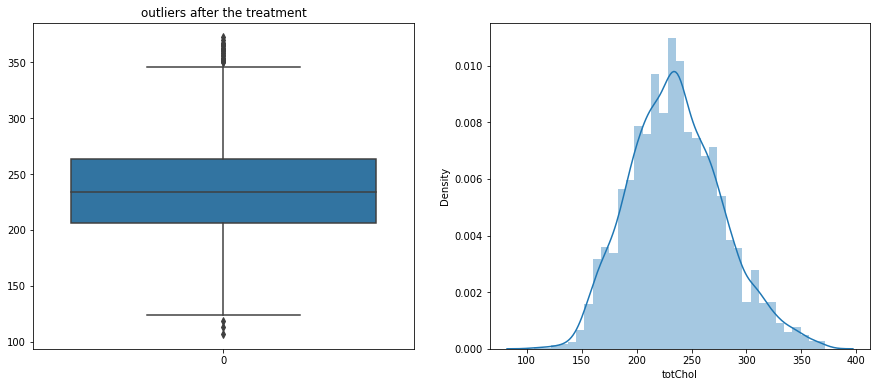

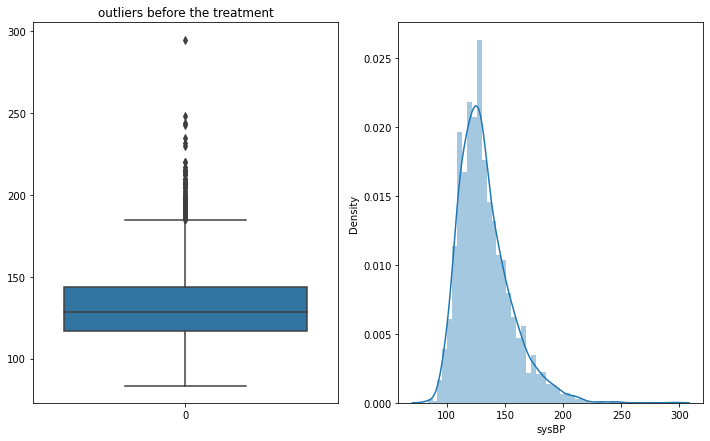

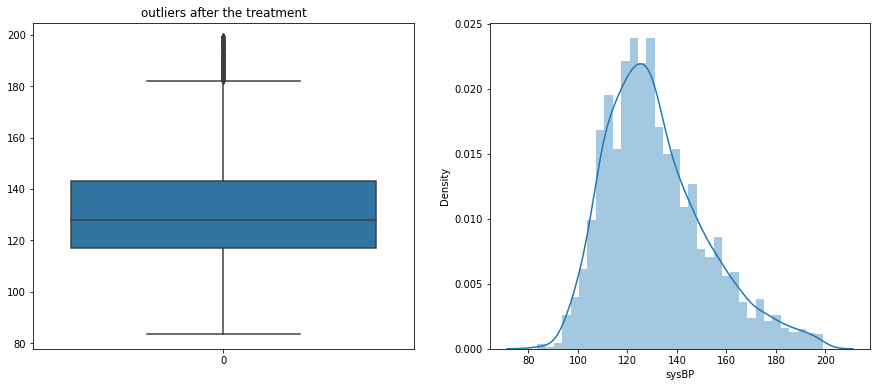

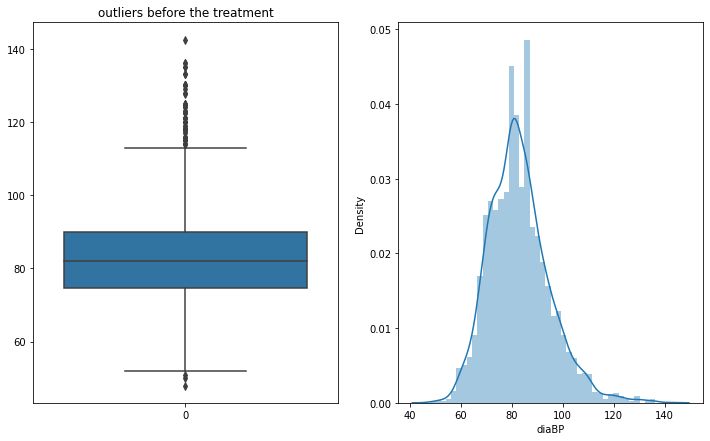

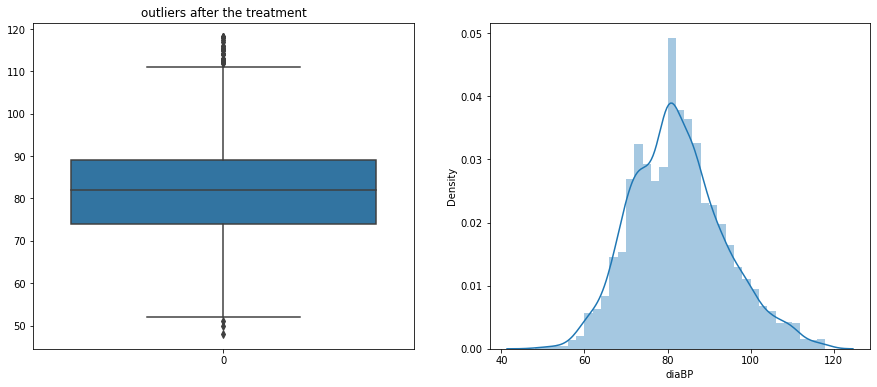

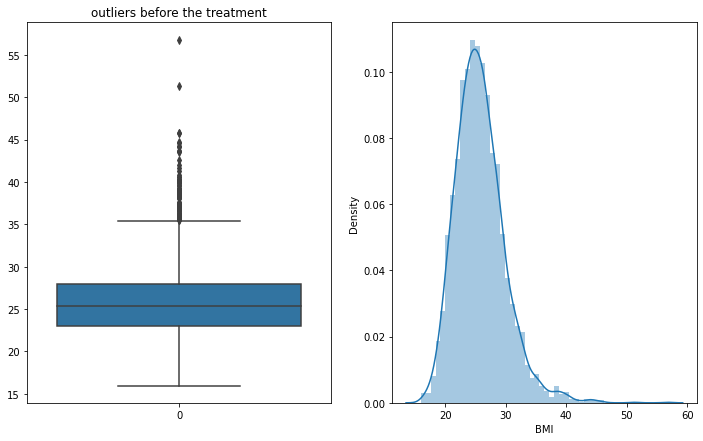

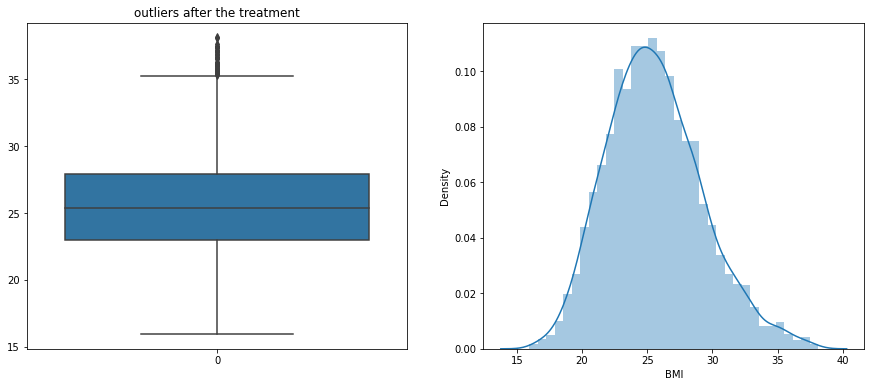

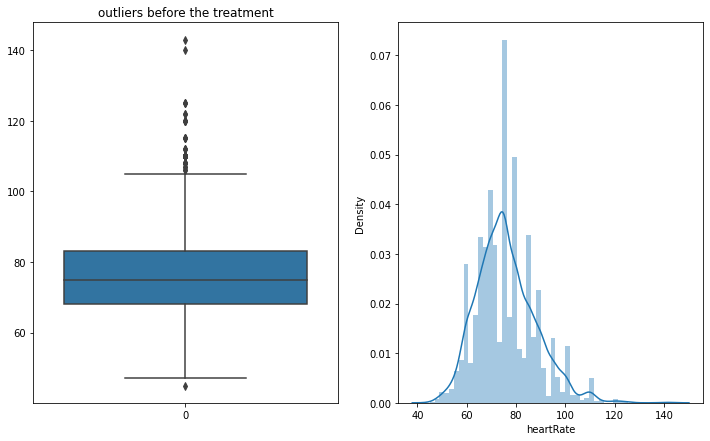

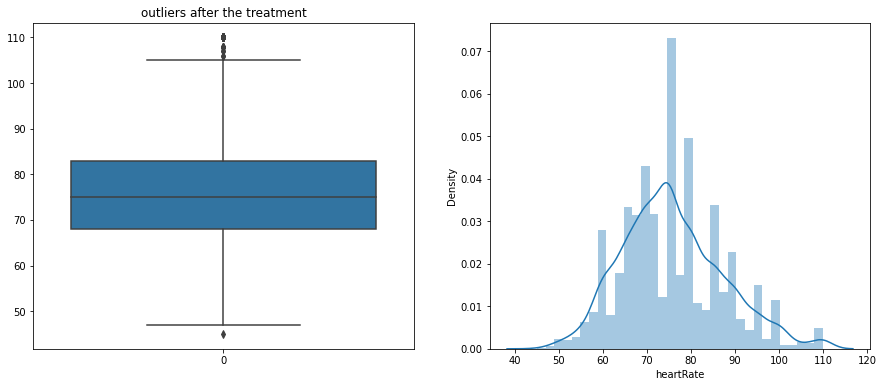

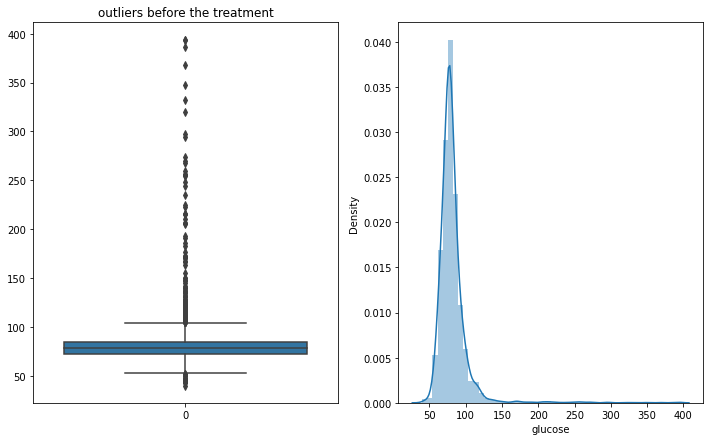

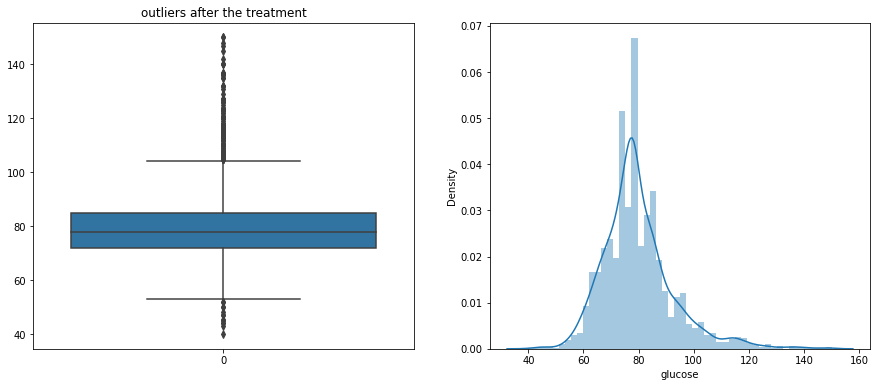

In [ ]:
### Now plot the outliers for the numerical columns
for columns in numerical_data:
  removal_outliers(df_cv,columns)

##### What all outlier treatment techniques have you used and why did you use those techniques?

A z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.

Z score treatment is a method I've used to handle outliers. The Z score, also known as the Standard Score, aids in determining if a data value is larger or smaller than the mean. It also aids in determining how far a certain data point is from the mean. In other words, it reveals how much a data point deviates from the mean by a given number of standard deviations.

We are not supposed to exclude every outlier in this dataset because doing so can confuse the model and lead to inaccurate forecasts for the general public. This is extremely dangerous and could put the person at risk of unintended death. So, the optimal course of action is to address outliers using the Z-score, or Standard score.



##3. **Feature Manipulation**

In order to enhance the training of our machine learning model, we can manipulate the features in our data set by adding, removing, combining, or mutating them. This improves model performance and accuracy.

Following a dataset exploration, the following alterations can be carried out:

**Addition of a new column**: The **pulse pressure** column, which represents the difference between** systolic BP and diastolic BP,** can be added. Then, since pulse pressure provides us with the necessary information, we may remove both columns.

Elimination of a current column: Since the **cigsPerDay column **already has information on **smokers and non-smokers**, we may categorise patients based on how many **cigarettes they smoke each day**. So, we shall remove the "**is smoking"** column.

Turning **cigsPerDay** into a category column is a mutation of an already-existing column.

In [ ]:
# Adding a new column pulse pressure in dataset
df_cv['pulsePressure'] = df_cv['sysBP'] - df_cv['diaBP']

In [ ]:
# Dropping the sysBP and dia BP columns from the dataset
df_cv.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [ ]:
#check the dataset
df_cv.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  TenYearCHD  \
0             0         0    221.0  25.38       90.0     80.0           1   
1             1         0    212.0  29.77       72.0     75.0           0   
2             0         0    250.0  20.35       88.0     94.0           0   
3             1         0    233.0  28.26       68.0     94.0           1   
4             0         0    241.0  26.42       70.0     77.0           0   

   pulsePressure  
0           63.0  
1           70.0  
2           45.0  
3           70.0  
4           51.5

In [ ]:
# Dropping the is_smoking column from the dataset
df_cv.drop(['is_smoking'], axis = 1, inplace = True)

In [ ]:
#now we will convert this cigsperday column into the categorical column

for i in range(len(df_cv)):
  if df_cv['cigsPerDay'][i] == 0:
    df_cv['cigsPerDay'][i] = 'Not Consumping'
  elif df_cv['cigsPerDay'][i] > 0 and df_cv['cigsPerDay'][i] < 20:
    df_cv['cigsPerDay'][i] = 'Average Consumting'
  else:
    df_cv['cigsPerDay'][i] = 'High Consumpting'

In [ ]:
df_cv.head(10)

age  education sex          cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F  Average Consumting     0.0                0   
1   36        4.0   M      Not Consumping     0.0                0   
2   46        1.0   F  Average Consumting     0.0                0   
3   50        1.0   M    High Consumpting     0.0                0   
4   64        1.0   F    High Consumpting     0.0                0   
5   61        3.0   F      Not Consumping     0.0                0   
6   61        1.0   M      Not Consumping     0.0                0   
7   36        4.0   M    High Consumpting     0.0                0   
8   41        2.0   F    High Consumpting     0.0                0   
9   55        2.0   F      Not Consumping     0.0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  TenYearCHD  \
0             0         0    221.0  25.38       90.0     80.0           1   
1             1         0    212.0  29.77       72.0     75.0           0   
2             0         0    250.0  20.35       88.0     94.0           0   
3             1         0    233.0  28.26       68.0     94.0           1   
4             0         0    241.0  26.42       70.0     77.0           0   
5             1         0    272.0  32.80       85.0     65.0           1   
6             1         0    238.0  24.83       75.0     79.0           0   
7             0         0    295.0  28.15       60.0     63.0           0   
8             0         0    220.0  20.70       86.0     79.0           0   
9             1         0    326.0  25.71       85.0     78.0           0   

   pulsePressure  
0           63.0  
1           70.0  
2           45.0  
3           70.0  
4           51.5  
5           61.0  
6           96.0  
7           34.0  
8           48.0  
9           63.0

In [ ]:
df_cv['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

### 3. **Categorical Encoding**

Without converting them to numerical values, the majority of machine learning algorithms cannot handle categorical variables. I have therefore converted categorical feature values into binary values in order to improve model training and prediction. A binary data is one that only has the states or values 0 and 1 as its conceivable states. The (0 and 1) are also known as (true and false), "yes" and "no," "success" and "failure," etc.

In [ ]:
df_cv_new=pd.get_dummies(df_cv, columns=['sex', 'education', 'cigsPerDay'],drop_first= True)
df_cv_new.columns

Index(['age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure',
       'sex_M', 'education_2.0', 'education_3.0', 'education_4.0',
       'cigsPerDay_High Consumpting', 'cigsPerDay_Not Consumping'],
      dtype='object')

In [ ]:
df_cv_new.head(5)

age  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol    BMI  \
0   64     0.0                0             0         0    221.0  25.38   
1   36     0.0                0             1         0    212.0  29.77   
2   46     0.0                0             0         0    250.0  20.35   
3   50     0.0                0             1         0    233.0  28.26   
4   64     0.0                0             0         0    241.0  26.42   

   heartRate  glucose  TenYearCHD  pulsePressure  sex_M  education_2.0  \
0       90.0     80.0           1           63.0      0              1   
1       72.0     75.0           0           70.0      1              0   
2       88.0     94.0           0           45.0      0              0   
3       68.0     94.0           1           70.0      1              0   
4       70.0     77.0           0           51.5      0              0   

   education_3.0  education_4.0  cigsPerDay_High Consumpting  \
0              0              0                            0   
1              0              1                            0   
2              0              0                            0   
3              0              0                            1   
4              0              0                            1   

   cigsPerDay_Not Consumping  
0                          0  
1                          1  
2                          0  
3                          0  
4                          0

## **Checking correlation after Encoding**

<Axes: >

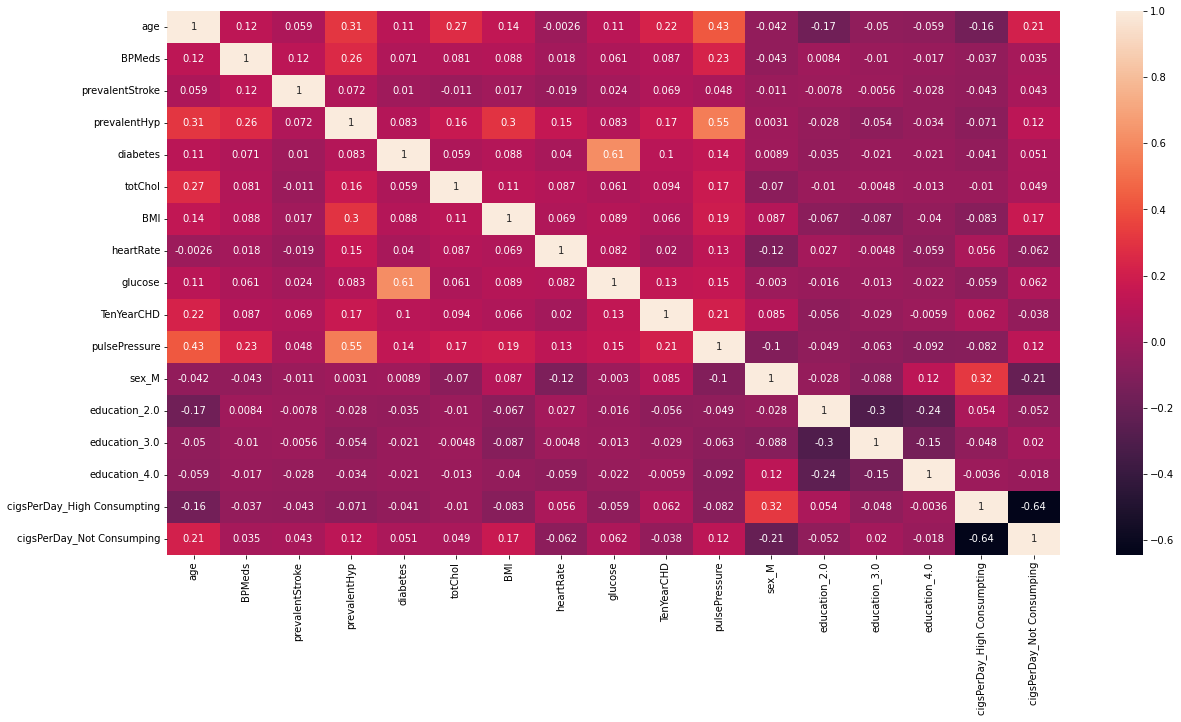

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cv_new.corr(),annot=True)

In [ ]:
df_cv_new.describe().columns

Index(['age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure',
       'sex_M', 'education_2.0', 'education_3.0', 'education_4.0',
       'cigsPerDay_High Consumpting', 'cigsPerDay_Not Consumping'],
      dtype='object')

In [ ]:
df_cv_new.columns

Index(['age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure',
       'sex_M', 'education_2.0', 'education_3.0', 'education_4.0',
       'cigsPerDay_High Consumpting', 'cigsPerDay_Not Consumping'],
      dtype='object')

#### **What all categorical encoding techniques have you used & why did you use those techniques?**



One-hot encoding is useful since it converts categorical data into numerical because our dataset contains categorical variables. In order to use our machine learning algorithms and anticipate the outcomes, it converts text into numbers.

## 4. **Feature Selection**

It is a technique for lowering the input variable to a model by using only pertinent data and eliminating data noise. Based on the nature of the problem, it is the process of selecting pertinent characteristics for our machine learning model.

Let's only include elements in our final dataframe that have a significant influence on the dependent variable. To do this, we are determining multicolinearity using the Variance Inflation Factor approach.

In [ ]:
# Now we have Define a function for variance_inflation_factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

    # Now Calculate the VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by = ['VIF'], ascending=False ))


define a vif_calc function for calculating the VIF


Calculating VIF(Variance Inflation Factor) by excluding:

"TenYearCHD" -> As it is target variable

In [ ]:
# calculating the vif by excluding some features which are not giving any information
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD"]]])


variables        VIF
0                           age  40.809744
6                           BMI  37.134314
7                     heartRate  34.068857
5                       totChol  30.199189
8                       glucose  20.246435
9                 pulsePressure  20.056453
15    cigsPerDay_Not Consumping   3.635833
14  cigsPerDay_High Consumpting   2.549160
3                  prevalentHyp   2.101880
10                        sex_M   2.094405
11                education_2.0   1.800271
4                      diabetes   1.562737
12                education_3.0   1.402752
13                education_4.0   1.283421
1                        BPMeds   1.133245
2               prevalentStroke   1.027446

Now,let's exclude BMI and check the VIF of all the independent variable



In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI']]])

variables        VIF
0                           age  39.240174
6                     heartRate  29.883834
5                       totChol  28.849931
8                 pulsePressure  19.949481
7                       glucose  19.634105
14    cigsPerDay_Not Consumping   3.523748
13  cigsPerDay_High Consumpting   2.542798
3                  prevalentHyp   2.091386
9                         sex_M   2.008775
10                education_2.0   1.800079
4                      diabetes   1.548364
11                education_3.0   1.402352
12                education_4.0   1.283403
1                        BPMeds   1.133240
2               prevalentStroke   1.027436

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol']]])

variables        VIF
0                           age  32.353621
5                     heartRate  27.070163
7                 pulsePressure  19.885628
6                       glucose  19.371114
13    cigsPerDay_Not Consumping   3.512348
12  cigsPerDay_High Consumpting   2.522522
3                  prevalentHyp   2.089451
8                         sex_M   2.008694
9                 education_2.0   1.776508
4                      diabetes   1.541997
10                education_3.0   1.392537
11                education_4.0   1.273636
1                        BPMeds   1.132702
2               prevalentStroke   1.026539

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate']]])

variables        VIF
0                           age  26.450474
6                 pulsePressure  19.254288
5                       glucose  16.663990
12    cigsPerDay_Not Consumping   3.504963
11  cigsPerDay_High Consumpting   2.446278
3                  prevalentHyp   2.085806
7                         sex_M   2.005617
8                 education_2.0   1.711800
4                      diabetes   1.463378
9                 education_3.0   1.366811
10                education_4.0   1.261411
1                        BPMeds   1.128943
2               prevalentStroke   1.025655

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure']]])

variables        VIF
0                           age  17.203155
5                       glucose  15.996129
11    cigsPerDay_Not Consumping   3.501702
10  cigsPerDay_High Consumpting   2.431762
6                         sex_M   1.987913
7                 education_2.0   1.708878
3                  prevalentHyp   1.687779
4                      diabetes   1.459549
8                 education_3.0   1.366763
9                 education_4.0   1.260360
1                        BPMeds   1.121338
2               prevalentStroke   1.025293

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure','glucose']]])

variables       VIF
0                           age  6.688795
10    cigsPerDay_Not Consumping  3.473893
9   cigsPerDay_High Consumpting  2.403526
5                         sex_M  1.980596
3                  prevalentHyp  1.681402
6                 education_2.0  1.638047
7                 education_3.0  1.340121
8                 education_4.0  1.244795
1                        BPMeds  1.121210
4                      diabetes  1.044713
2               prevalentStroke  1.025251

In [ ]:

# Feature Selection
selected_features = vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure','glucose']]])['variables'].unique()
selected_features

array(['age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting',
       'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0',
       'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke'],
      dtype=object)

In [ ]:
df_cv_new1 = df_cv_new[['age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting',
       'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0',
       'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke']]

In [ ]:
df_cv_new1.head()

age  cigsPerDay_Not Consumping  cigsPerDay_High Consumpting  sex_M  \
0   64                          0                            0      0   
1   36                          1                            0      1   
2   46                          0                            0      0   
3   50                          0                            1      1   
4   64                          0                            1      0   

   prevalentHyp  education_2.0  education_3.0  education_4.0  BPMeds  \
0             0              1              0              0     0.0   
1             1              0              0              1     0.0   
2             0              0              0              0     0.0   
3             1              0              0              0     0.0   
4             0              0              0              0     0.0   

   diabetes  prevalentStroke  
0         0                0  
1         0                0  
2         0                0  
3         0                0  
4         0                0

Also, we eliminated some of the features that were causing noise during model implementation by using the filter approach in conjunction with a correlation heatmap and a VIF (varying inflation factor). Also, we have eliminated multicolinearity and chosen characteristics that depend heavily on our objective variable.

Due to their strong correlation with the goal variable (Sales), and the fact that no two characteristics provide the identical information, we have chosen the features listed below as our final features.

'age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting', 'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0', 'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke'

## **Train Test Split**

In [ ]:
#Storing the independent features in the variable X
X = df_cv_new1

#Storing the dependent feature in the variable y 
y = df_cv['TenYearCHD']

#Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

### 6. **Data Scaling**

**Standardizing the data using MinMax Scaler**

In machine learning, data scaling is a crucial step that ensures that all features are on a same scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling data

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I scaled the data using MinMaxScaler because it keeps the original distribution's shape. The information present in the original data is not materially altered. Also, the fact that MinMaxScaler does not diminish the significance of outliers is another key factor in choosing it. The MinMaxScaler's feature has a default range of 0 to 1.

##7 **Handling Imbalanced Dataset**

Any dataset that is unbalanced may cause the model to favour the dominant class. Because it helps keep the model from getting biassed towards one class, such as the majority class, balancing a dataset makes it easier to train a model.

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


<Axes: ylabel='TenYearCHD'>

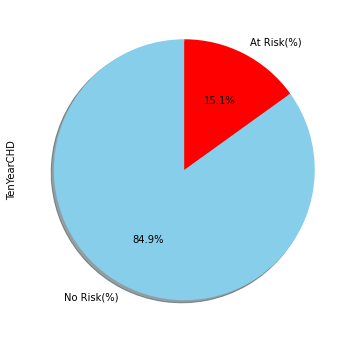

In [ ]:

print(df_cv.TenYearCHD.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_cv['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No Risk(%)','At Risk(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Do you think the dataset is imbalanced? Explain Why?

As we can see, there is a definite imbalance between the classes in one of the observations. As a result, we will oversample the classes with the lowest number using SMOTE.

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Handling Imbalanced Dataset (If needed)
x_train_smote, y_train_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_train_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2298
1     414
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
1    2203
0    2203
Name: TenYearCHD, dtype: int64 



In [ ]:
x_test_smote, y_test_smote = SMOTETomek(random_state=42).fit_resample(x_test, y_test)


What technique did you use to handle the imbalance dataset and why? (If needed to be balanced) 


I have utilised SMOTE to address the **data's 85:15 imbalance** (Synthetic Minority Over-sampling technique).

A data augmentation algorithm called **SMOTE produces artificial dat**a points from raw data. As a result, it can be viewed as an advanced form of oversampling or a particular data augmentation approach. The benefit of this method is that it produces artificial data points rather than duplicates of the real data points. **SMOTE is therefore a better oversampling solution.**

## ***7. ML Model Implementation***

Following models have been used for predictions:-

* **Logistic Regression Classifier**

* **SVM (Support Vector Machine)**

*  **Naive Bayes**

* **Decision Tree**

* **KNN (K-Nearest Neighbours)**

* **Random Forest Classifier**

* **AdaBoost**

* **XGBoost Classifier**

## **Model Training**

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score 
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


**Evaluation Metrics Used**-

* **Accuracy**: The percentage of times a classifier predicts properly is known as accuracy. Accuracy is determined by dividing the total number of forecasts by the total number of right guesses. You could assume a model is performing really well if it has a 99 percent accuracy rate. This isn't always the case, though, and in some circumstances it can be deceptive.

Accuracy is helpful when the target class is well-balanced, but accuracy is not a wise choice for classes that are not well-balanced.

* **Confusion Matrix**: A performance indicator for classification issues in machine learning where the output can include two or more classes is the confusion matrix. It is a table with combinations of the actual and expected values. A confusion matrix is a common term for the table that shows how well a classification model performs on a set of test data for which the true values are known. It is quite useful for figuring out the precision, recall, and accuracy of the AUC-ROC curves.

* **Precision**: The proportion of instances that were correctly predicted but ultimately won is explained by precision. Precision can be helpful when False Positives are more of a worry than False Negatives.

The precision of a label is calculated by dividing the expected positives by the actual positives.

* **Recall**:The percentage of real positive cases that our model properly predicted is known as recall. This statistic is useful when False Negative is more significant than False Positive. In medical situations, whether or not we raise a false alarm is important, but the real positive cases also deserve attention. The definition of recall for a label is the ratio of true positives to total actual positives.

* **F1 Score**: Both precision and recall measurements are taken into account in this score. It reaches its pinnacle when Precision and Recall are equal.The F1 Score is the harmonic mean of recall and precision.

* **AUC-ROC**: A probability curve known as the Receiver Operator Characteristic (ROC) distinguishes "signal" from "noise" by comparing the TPR (True Positive Rate) versus the FPR (False Positive Rate) at different threshold values. The Area Under the Curve is a metric used to assess a classifier's ability to distinguish between classes (AUC). When AUC is equal to 1, it simply means that the classifier is capable of accurately differentiating between all Positive and Negative class points. When the AUC was zero, the classifier would properly classify all negatives as positives.

In [ ]:
# empty list for appending performance metric score 
result_of_model = []

def analyse_predict_model(model_ml, model_name):
  
  '''
  Predict value and pass the model.
All development metrics will be calculated by the function and their scores added to the model result table.
roc curve and confusion matrix plots for test data.
  ''' 
  
  # Now we fit the model
  model_fit = model_ml.fit(x_train_smote, y_train_smote)
  
  # predicting value and probability
  y_train_pred =  model_fit.predict(x_train_smote)
  y_test_pred =  model_fit.predict(x_test_smote)
  y_train_prob =  model_fit.predict_proba(x_train_smote)[:,1]
  y_test_prob =  model_fit.predict_proba(x_test_smote)[:,1]


  ''' Performance Metrics of the models''' 
  # the accuracy score is ---->  (TP+TN)/(TP+FP+TN+FN)
  train_set_accuracy = accuracy_score(y_train_smote, y_train_pred) 
  test_set_accuracy = accuracy_score(y_test_smote, y_test_pred)
  print(f'train accuracy is: {round(train_set_accuracy,3)}')
  print(f'test accuracy is: {round(test_set_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_set_precision = precision_score(y_train_smote, y_train_pred)
  test_set_precision = precision_score(y_test_smote, y_test_pred)
  print(f'train precision : {round(train_set_precision,3)}')
  print(f'test precision : {round(test_set_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_set_recall = recall_score(y_train_smote, y_train_pred)
  test_set_recall = recall_score(y_test_smote, y_test_pred)
  print(f'train recall : {round(train_set_recall,3)}')
  print(f'test recall : {round(test_set_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall is as follow
  train_f1_score = f1_score(y_train_smote, y_train_pred)
  test_f1_score = f1_score(y_test_smote, y_test_pred)
  print(f'train f1 score is: {round(train_f1_score,3)}')
  print(f'test f1 score is : {round(test_f1_score,3)}')
  
  # roc_auc score  ----> it will show the how well the model differenciate between its classes.
  train_set_roc_auc = roc_auc_score(y_train_smote, y_train_prob)
  test_set_roc_auc = roc_auc_score(y_test_smote, y_test_prob)
  print(f'train roc_auc is: {round(train_set_roc_auc,3)}')
  print(f'test roc_auc is: {round(test_set_roc_auc,3)}')
  print('-'*80)

  # now the classification report
  print(f'The classification report of this test data is \n{classification_report(y_test_smote, y_test_pred)}')
  print('-'*80)


  ''' Now the plot of Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test_smote, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' now the plot of ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test_smote, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data set', weight='bold')
  plt.xlabel('False Positive Rate ----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test_smote, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  result_of_model.append({'model':model_name,
                       'train_accuracy':train_set_accuracy, 
                       'test_accuracy':test_set_accuracy, 
                       'train_precision':train_set_precision,
                       'test_precision':test_set_precision,
                       'train_recall':train_set_recall,
                       'test_recall':test_set_recall,
                       'train_f1':train_f1_score,
                       'test_f1':test_f1_score,
                       'train_roc_auc':train_set_roc_auc,
                       'test_roc_auc':test_set_roc_auc})

### ML Model - 1 **Logistic Regression**

One of the simplest techniques for evaluating the correlation between independent variables and a single binary dependent variable and calculating the probability of an event occurring is logistic regression.

The trade-off between keeping the model basic (underfitting) and making it more complex is controlled by the regulation parameter C. (overfitting). The model becomes increasingly complex and the power of regulation declines as C increases, overfitting the data as a result.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

train accuracy is: 0.681
test accuracy is: 0.707
train precision : 0.677
test precision : 0.696
train recall : 0.693
test recall : 0.736
train f1 score is: 0.685
test f1 score is : 0.715
train roc_auc is: 0.731
test roc_auc is: 0.761
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       546
           1       0.70      0.74      0.72       546

    accuracy                           0.71      1092
   macro avg       0.71      0.71      0.71      1092
weighted avg       0.71      0.71      0.71      1092

--------------------------------------------------------------------------------


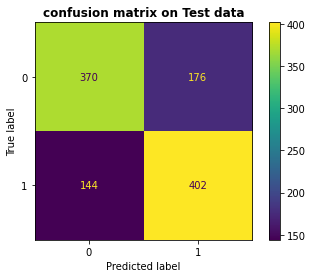

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  0  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


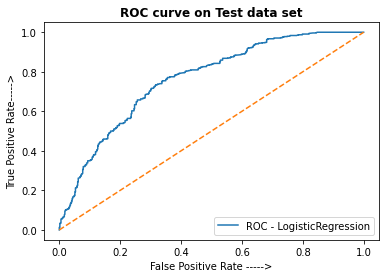

In [ ]:
# Implement the logistic regression in the model
analyse_predict_model(LogisticRegression(), 'LogisticRegression')


## ML Model -2 **SVM (Support Vector Machine)**

A Support Vector Machine (SVM) does classification by identifying the hyperplane with the largest margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors. The SVM method seeks a hyperplane in an N-dimensional space that clearly classifies the data points.

The hyperplane's dimension depends on the quantity of features. If there are only two input characteristics, the hyperplane is just a line. When there are three input features, the hyperplane collapses to a two-dimensional plane. It becomes challenging to imagine when there are more than three features.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

train accuracy is: 0.708
test accuracy is: 0.701
train precision : 0.701
test precision : 0.692
train recall : 0.728
test recall : 0.727
train f1 score is: 0.714
test f1 score is : 0.709
train roc_auc is: 0.775
test roc_auc is: 0.775
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       546
           1       0.69      0.73      0.71       546

    accuracy                           0.70      1092
   macro avg       0.70      0.70      0.70      1092
weighted avg       0.70      0.70      0.70      1092

--------------------------------------------------------------------------------


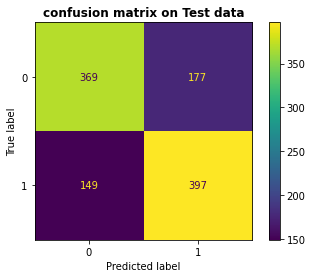

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  1  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


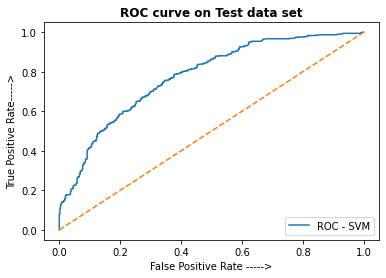

In [ ]:
#implement the model
analyse_predict_model(SVC(probability=True), 'SVM')


ML Model -3  **Naive Bayes**

**Explain the ML Model and it's performance using Evaluation metric Score Chart.**

train accuracy is: 0.6
test accuracy is: 0.638
train precision : 0.758
test precision : 0.796
train recall : 0.295
test recall : 0.372
train f1 score is: 0.424
test f1 score is : 0.507
train roc_auc is: 0.721
test roc_auc is: 0.745
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.59      0.90      0.71       546
           1       0.80      0.37      0.51       546

    accuracy                           0.64      1092
   macro avg       0.69      0.64      0.61      1092
weighted avg       0.69      0.64      0.61      1092

--------------------------------------------------------------------------------


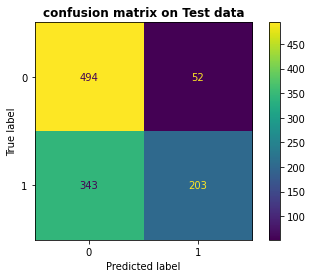

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  0  1  0  0  0  0  0  0  0  0
--------------------------------------------------------------------------------


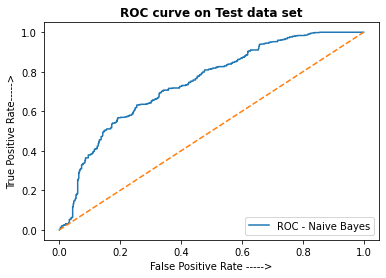

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Analysing the model Visualizing evaluation Metric Score chart
analyse_predict_model(GaussianNB(), 'Naive Bayes')

Naive bayes is not giving much good results as per expected. Although the test auc-roc score is 0.745 which is pretty good but the test accuracy is 63.8% which is not good and even the test f1 score is 50.7 %.



## ML Model -4 **Decision Tree**

A decision tree is a tree-like machine learning model that uses the values of the input features to break down a set of rules or conditions into smaller and smaller sub-conditions in order to produce predictions or judgements.

A test on a feature is represented by each node in the tree, and its result is shown by each branch. The leaves, or tree's terminal branches, stand in for the class's forecasts or choices. By determining the optimum feature to split the data depending on the information gain or loss in impurity at each node, the tree is constructed recursively.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

train accuracy is: 0.929
test accuracy is: 0.793
train precision : 0.956
test precision : 0.865
train recall : 0.9
test recall : 0.694
train f1 score is: 0.927
test f1 score is : 0.77
train roc_auc is: 0.986
test roc_auc is: 0.813
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       546
           1       0.87      0.69      0.77       546

    accuracy                           0.79      1092
   macro avg       0.80      0.79      0.79      1092
weighted avg       0.80      0.79      0.79      1092

--------------------------------------------------------------------------------


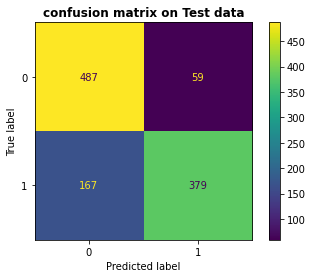

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  0  0  0  0  0  0  0  1  0
--------------------------------------------------------------------------------


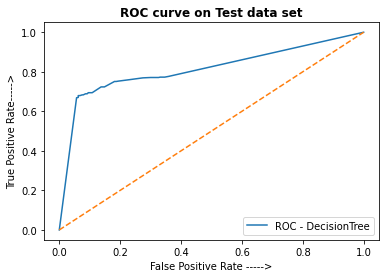

In [ ]:
analyse_predict_model(DecisionTreeClassifier(), 'DecisionTree')


## ML Model -5 **KNN (K-Nearest Neighbours)**

Classification and regression issues can be resolved using the supervised machine learning algorithm KNN, also known as K-nearest neighbour. K does not make any assumptions about the assumptions underlying the data, hence it is not a non-parametric nearest neighbour. Here, the algorithm classifies an input or unseen data set based on the traits that the nearby data points share. These nearest neighbours are determined by the distance between two places. Euclidean distance, Manhattan distance, Minkowski distance, cosine similarity measure, and other distance metrics may be used.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

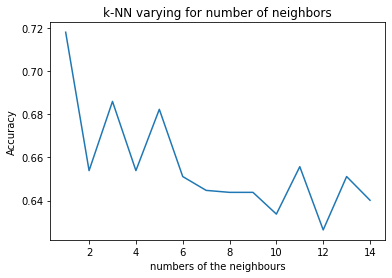

In [ ]:
# Lets Check the optimum value of the k:
accuracy_knn=[]

# Iterate for the optimum values of k in KNN
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_smote,y_train_smote)
  accuracy_knn.append(knn.score(x_test_smote, y_test_smote))

#lets we have to plot the k-value vs accuracy i.e
plt.title('k-NN varying for number of neighbors')
plt.plot(range(1,15), accuracy_knn)
plt.xlabel('numbers of the neighbours')
plt.ylabel('Accuracy')
plt.show()

     

train accuracy is: 0.896
test accuracy is: 0.718
train precision : 0.936
test precision : 0.779
train recall : 0.85
test recall : 0.608
train f1 score is: 0.891
test f1 score is : 0.683
train roc_auc is: 0.896
test roc_auc is: 0.718
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       546
           1       0.78      0.61      0.68       546

    accuracy                           0.72      1092
   macro avg       0.73      0.72      0.71      1092
weighted avg       0.73      0.72      0.71      1092

--------------------------------------------------------------------------------


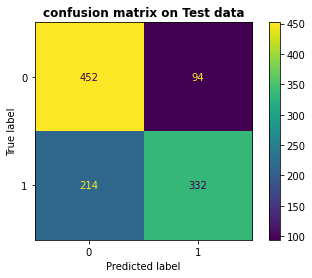

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  0  0  0  0  0  0  1  0  0
--------------------------------------------------------------------------------


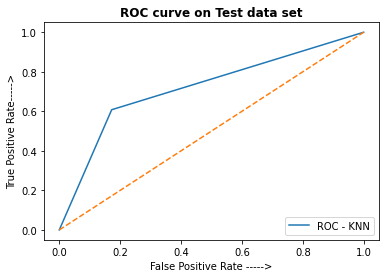

In [ ]:
#KNN model predict
analyse_predict_model(KNeighborsClassifier(n_neighbors=1), 'KNN')


## ML Model -6 **Random Forest**

A machine learning technique known as Random Forest constructs several decision trees and then combines their predictions to get a final classification or regression prediction. By integrating the output of numerous trees, each constructed on a distinct subset of the data, Random Forest, as opposed to a single decision tree, lowers the danger of overfitting.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

train accuracy is: 0.68
test accuracy is: 0.709
train precision : 0.672
test precision : 0.688
train recall : 0.702
test recall : 0.764
train f1 score is: 0.687
test f1 score is : 0.724
train roc_auc is: 0.756
test roc_auc is: 0.804
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       546
           1       0.69      0.76      0.72       546

    accuracy                           0.71      1092
   macro avg       0.71      0.71      0.71      1092
weighted avg       0.71      0.71      0.71      1092

--------------------------------------------------------------------------------


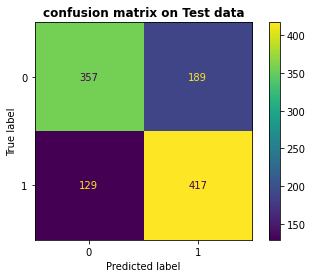

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  0  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


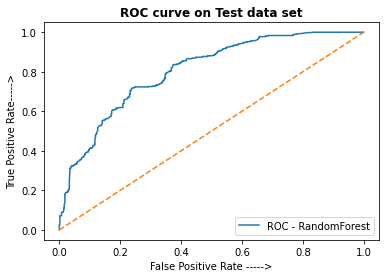

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_predict_model(RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0), 'RandomForest')

**Cross- Validation & Hyperparameter Tuning**

train accuracy is: 0.814
test accuracy is: 0.757
train precision : 0.794
test precision : 0.75
train recall : 0.847
test recall : 0.773
train f1 score is: 0.82
test f1 score is : 0.761
train roc_auc is: 0.909
test roc_auc is: 0.819
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       546
           1       0.75      0.77      0.76       546

    accuracy                           0.76      1092
   macro avg       0.76      0.76      0.76      1092
weighted avg       0.76      0.76      0.76      1092

--------------------------------------------------------------------------------


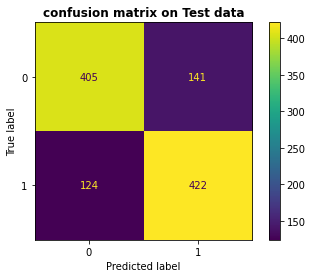

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  0  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


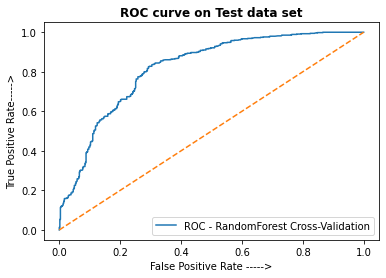

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier(random_state=0)

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]} 

# Analysing the model
analyse_predict_model(GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5),'RandomForest Cross-Validation' )

##### Which hyperparameter optimization technique have you used and why?

We utilised GridSearchCV as the hyperparameter optimization method since it makes use of all feasible hyperparameter combinations and yields more precise results. The performance of each combination is then calculated, and the optimal value for the hyperparameters is chosen. This provides the most precise tweaking approach.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the test set F1 score has been imporoved and also improve in accuracy. 

Even improvement in auc-roc.

## ML Model -7 **AdaBoost**

An ensemble machine learning approach called AdaBoost (Adaptive Boosting) combines several weak models to create a stronger model. In order to appropriately categorise or forecast the objective variable, weak models are iteratively constructed by applying weights to the data points in a dataset. The weights of the misclassified or incorrectly forecasted data points are increased after each iteration, increasing the likelihood that the following weak model would concentrate on these points.

**Explain the ML Model used and it's performance using Evaluation metric Score Chart**

train accuracy is: 0.697
test accuracy is: 0.727
train precision : 0.692
test precision : 0.705
train recall : 0.71
test recall : 0.78
train f1 score is: 0.701
test f1 score is : 0.741
train roc_auc is: 0.776
test roc_auc is: 0.809
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       546
           1       0.71      0.78      0.74       546

    accuracy                           0.73      1092
   macro avg       0.73      0.73      0.73      1092
weighted avg       0.73      0.73      0.73      1092

--------------------------------------------------------------------------------


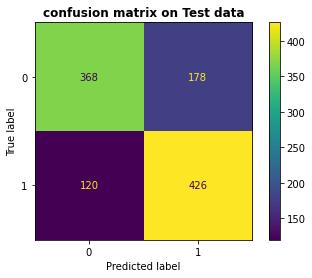

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  0  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


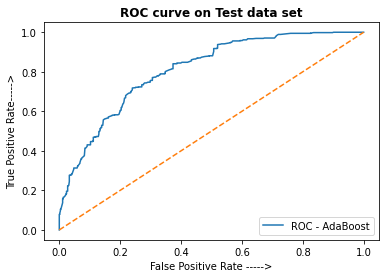

In [ ]:
#implement the adaboosting classifier in the mode
analyse_predict_model(AdaBoostClassifier(), 'AdaBoost')

##ML Model -8 **XGboost**

The Gradient Boosting technique has been enhanced for large-scale and complex data, and this version is known as XGBoost (eXtreme Gradient Boosting). With the help of several decision trees and the combination of their predictions, the ensemble learning algorithm XGBoost creates a final prediction.

**Explain the ML Model and it's performance using Evaluation metric Score Chart.**

train accuracy is: 0.696
test accuracy is: 0.72
train precision : 0.686
test precision : 0.697
train recall : 0.722
test recall : 0.777
train f1 score is: 0.703
test f1 score is : 0.735
train roc_auc is: 0.769
test roc_auc is: 0.792
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       546
           1       0.70      0.78      0.73       546

    accuracy                           0.72      1092
   macro avg       0.72      0.72      0.72      1092
weighted avg       0.72      0.72      0.72      1092

--------------------------------------------------------------------------------


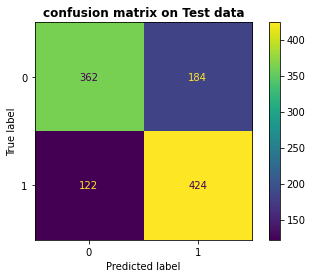

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  1  1  0  0  1  0  1  0  1  1
--------------------------------------------------------------------------------


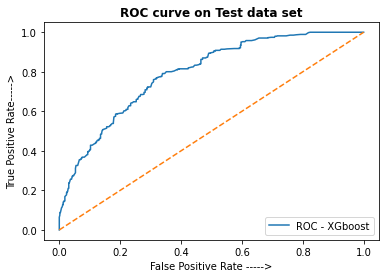

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_predict_model(XGB_classifier, 'XGboost')

**Cross- Validation & Hyperparameter Tuning**

train accuracy is: 0.912
test accuracy is: 0.868
train precision : 0.947
test precision : 0.909
train recall : 0.872
test recall : 0.819
train f1 score is: 0.908
test f1 score is : 0.861
train roc_auc is: 0.968
test roc_auc is: 0.928
--------------------------------------------------------------------------------
The classification report of this test data is 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       546
           1       0.91      0.82      0.86       546

    accuracy                           0.87      1092
   macro avg       0.87      0.87      0.87      1092
weighted avg       0.87      0.87      0.87      1092

--------------------------------------------------------------------------------


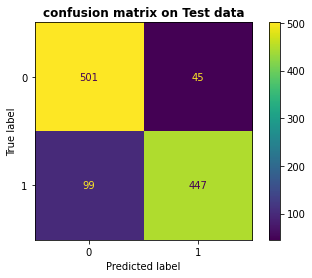

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  1  0  1  0  0  0  0  0
y_predict  0  0  0  0  0  0  0  0  1  0
--------------------------------------------------------------------------------


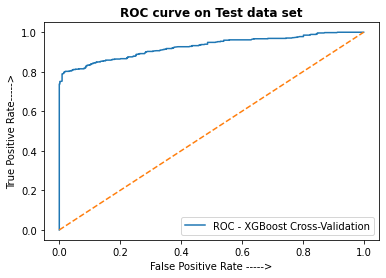

In [ ]:

# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining the classifier instance
classifier= XGBClassifier(random_state=0)

# Defining the parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_predict_model(XGB_grid_classifier, 'XGBoost Cross-Validation')

**Which hyperparameter optimization technique have you used and why?**

Hyperparameter tweaking has been carried out using GridSearchCV. We use hyperparameter tuning to increase the prediction power of our models. The machine learning model for a variety of hyperparameter values is used in the gridsearchCV technique. From a grid of hyperparameter values, it looks for the best set of hyperparameter values.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**


Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost. after doing the Cross- Validation & Hyperparameter Tuning test accuracy improved 72% to 86.8%
test recall also improved like 77.7% to 87.2%. Even the f1 score of test has been improved i.e 73.5% to 86.1% and so many improvment have done. So we can say that this is the best classifier for the model

**Which Evaluation metrics did you consider for a positive business impact and why?**


Since our data pertains to healthcare, we have placed a lot of emphasis on recall because it contains false-negative data, and we don't want our model to predict that people who could have coronary heart disease are healthy (Risky). We have emphasised lot of recall in order to prevent such situations.

Also, we have taken into account the F-1 score as another evaluation metric because it maintains a trade-off between Precision and Recall (as we also don't want our model to forecast healthy patients as infected) and is the harmonic mean of the two.

We must take accuracy and AUC-ROC score into account in order to calculate the percentage of accurate predictions for either class among all of the predictions made by the model.

In [ ]:
result_of_model

result_of_model = pd.DataFrame(result_of_model)
round(result_of_model,3)

model  train_accuracy  test_accuracy  \
0             LogisticRegression           0.681          0.707   
1                            SVM           0.708          0.701   
2                    Naive Bayes           0.600          0.638   
3                   DecisionTree           0.929          0.793   
4                            KNN           0.896          0.718   
5                   RandomForest           0.680          0.709   
6  RandomForest Cross-Validation           0.814          0.757   
7                       AdaBoost           0.697          0.727   
8                        XGboost           0.696          0.720   
9       XGBoost Cross-Validation           0.912          0.868   

   train_precision  test_precision  train_recall  test_recall  train_f1  \
0            0.677           0.696         0.693        0.736     0.685   
1            0.701           0.692         0.728        0.727     0.714   
2            0.758           0.796         0.295        0.372     0.424   
3            0.956           0.865         0.900        0.694     0.927   
4            0.936           0.779         0.850        0.608     0.891   
5            0.672           0.688         0.702        0.764     0.687   
6            0.794           0.750         0.847        0.773     0.820   
7            0.692           0.705         0.710        0.780     0.701   
8            0.686           0.697         0.722        0.777     0.703   
9            0.947           0.909         0.872        0.819     0.908   

   test_f1  train_roc_auc  test_roc_auc  
0    0.715          0.731         0.761  
1    0.709          0.775         0.775  
2    0.507          0.721         0.745  
3    0.770          0.986         0.813  
4    0.683          0.896         0.718  
5    0.724          0.756         0.804  
6    0.761          0.909         0.819  
7    0.741          0.776         0.809  
8    0.735          0.769         0.792  
9    0.861          0.968         0.928

* In our dataset, the majority and minority of the counts, respectively, originate from **the negative and positive.** **When dealing with unbalanced data or classes, accuracy scores aren't very useful.**

* The **classification of a healthy person** as having a **10-year risk of coronary heart disease(CHD) (false positive)** and the performance of extra medical tests are permissible; nevertheless, it is absolutely inappropriate to fail to recognise a patient or to **categorically label a patient as healthy (false negative)**. As a result, **our study will be primarily focused on the model's recall score.**


* When the importance of the** positives and negatives is equal**,** balanced accuracy is a superior statistic to F1**. **F1 is a great scoring** metric for skewed data when **greater focus is needed.**

## **Visulize the test_reall and F1 score of the model in different classifiers**

<Axes: xlabel='model', ylabel='test_recall'>

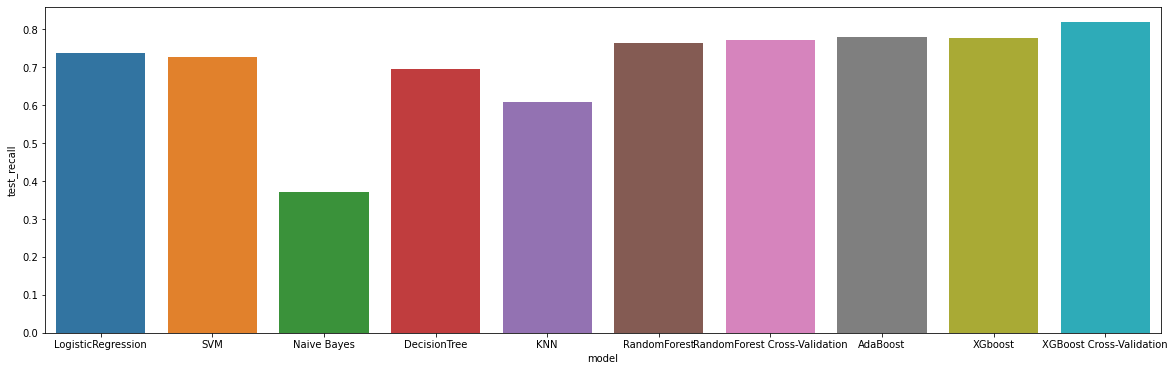

In [ ]:
# plot a graph to compare each model's performance
plt.figure(figsize=(20,6))
sns.barplot(x=result_of_model['model'], y=result_of_model['test_recall'])   # Model vs test Recall score

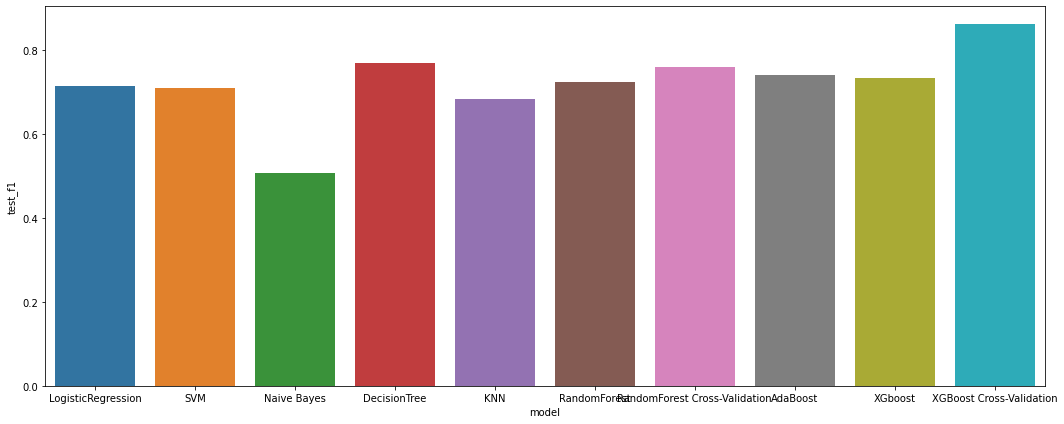

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=result_of_model['model'], y=result_of_model['test_f1'])       # Model vs test F1 score 
plt.tight_layout()

## 1. **Which Evaluation metrics did you consider for a positive business impact and why?**

We were required to create a model that could predict whether a person would experience **CHD using the dataset,** which contains the **medical histories of numerous individuals**. 

In this instance, **False Negatives (Overlooked Cases)**are more expensive than **False Alarms (False Positive)**. We can see that there is a significant cost associated with False Negatives, meaning that it would be very fatal for the patient if the model failed to forecast that he or she would suffer from CHD. **I used "Recall" and "F1 score" as the model metrics** to choose the **best machine learning model specifically to address this problem.**

## 2. **Which ML model did you choose from the above created models as your final prediction model and why?**

the highest **test recall, test F-1 score **and accuracy we are getting with **XGBoost after Cross-Validation**. So , we are considering **XGBoost after Cross-Validation as our final optimal model** and can give predictions on the unseen data with **91.2% of accuracy and can be used for deployment purpose.**

The **ultimate model we settled on was XGBoost after Cross-Validation**since we didn't want to estimate someone's safety incorrectly while they were at risk for TenYearCHD.

## **3. Explain feature importance ?**

In [ ]:
df_cv_new1 = df_cv_new[['age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting',
       'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0',
       'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke']]

df_cv_new1.head()

age  cigsPerDay_Not Consumping  cigsPerDay_High Consumpting  sex_M  \
0   64                          0                            0      0   
1   36                          1                            0      1   
2   46                          0                            0      0   
3   50                          0                            1      1   
4   64                          0                            1      0   

   prevalentHyp  education_2.0  education_3.0  education_4.0  BPMeds  \
0             0              1              0              0     0.0   
1             1              0              0              1     0.0   
2             0              0              0              0     0.0   
3             1              0              0              0     0.0   
4             0              0              0              0     0.0   

   diabetes  prevalentStroke  
0         0                0  
1         0                0  
2         0                0  
3         0                0  
4         0                0

Text(0, 0.5, 'features data')

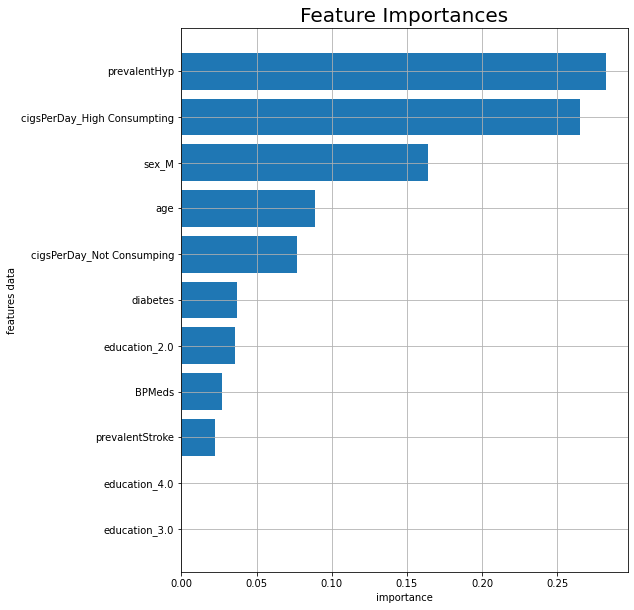

In [ ]:

# Plotting the barplot to determine which feature is contributing the most
features = df_cv_new1.columns
importances = XGB_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')

plt.yticks(range(len(indices)), features[indices])
plt.xlabel('importance')
plt.ylabel('features data')

In [ ]:
# Checking the percentage of feature importance
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

Variable  Importance
4                  prevalentHyp   28.266695
2   cigsPerDay_High Consumpting   26.539555
3                         sex_M   16.385052
0                           age    8.900157
1     cigsPerDay_Not Consumping    7.658409
9                      diabetes    3.723490
5                 education_2.0    3.581282
8                        BPMeds    2.679774
10              prevalentStroke    2.265584
6                 education_3.0    0.000000
7                 education_4.0    0.000000

Even though we chose **XGboost as our final optimal model**because of its high accuracy, this model is still regarded as a "black box" because we are unsure of the exact workings of the algorithm. We must provide stakeholders with an explanation of the model and the circumstances under why it is forecasting a specific result, together with a rational and convincing justification, in order to earn their trust. We have therefore drawn a bar plot for the decreasing sequence of feature importance in order to boost explainability.


It is clear from the above plot that for the XGboost model, **"prevalentHyp" contributes the most, or 28.26%**, to the ultimate outcome, followed by "**cigsPerDay High Consuming," at 26.53%,** and "sex M," at age.

As we can observe that **prevalentHyp** is affecting our target variable the most. It is followed by cigsPerDay High Consuming, sex_M and age. Other features are comparatively contributing less towards the prediction of target variable.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


* **Exploratory Data Analysis (EDA)**, which enables the preliminary analysis of a dataset, is a crucial stage. It aids in finding trends, irregularities, and connections in the data as well as spotting any **potential problems such missing values or outliers.** It is also an excellent **approach to comprehend the data,** which is essential for making wise decisions.** EDA also aids in giving the data a better understanding and aids in directing the course of additional investigation.**

**EDA Insights & Conclusions:**

* Diabetes and glucose are highly correlated; as we know, people with diabetes have high blood sugar because their bodies do not create enough insulin to break down their glucose and use it as an energy source.

* sysBP and diaBP are closely related to one another, and hypertension (high blood pressure) is a common condition that calls for medicine.

* Age, prevalence of hypertension, total cholesterol, and diabetes are all strongly linked with 10-year CHD. So, if a person has all of these conditions, they may be at risk of developing CHD.

* **As you become older, your chance of developing heart disease rises.**
* **The age range from 49 to 61 is more susceptible to CHD in women.**
* **Men in the age range of 48 to 59 are more likely to have CHD than females.**
* Despite the fact that smoking cigarettes contributes significantly to CHDs, there aren't many differences between smokers and nonsmokers.

* Patients with diabetes and cholesterol issues have an increased risk of coronary heart disease. According to our data, approximately 61% of diabetics are at high risk.

* Individuals with high blood glucose levels are more likely to develop CHDs. According to our dataset, the majority of CHD patients have glucose levels as high as 150*.

* Individuals who have a high BMI (body mass index) are more likely to develop CHDs.

## **Conclusions from ML Model Implementation**
* In this project, we dealt with a classification challenge where we had to categorise and forecast the **patient's 10-year chance of developing coronary heart disease (CHD).** The project's objective was to use machine learning to produce a tool for the **early detection and prevention of CHD, addressing a serious public health issue.**

> **Our goal variable for this dataset is "TenYearCHD," which identifies individuals who have experienced a cardiovascular problem within the last ten years.**

> i used the following classifier for this model

**LogisticRegression, SVM, Naive Bayes, DecisionTree, KNN, RandomForest, RandomForest Cross-Validation,AdaBoost, XGboost, XGBoost Cross-Validation	**

* We were required to create a model that could predict whether a person would experience CHD using the dataset, which contains the medical histories of numerous individuals. In this instance, False Negatives (Overlooked Cases) are more expensive than False Alarms (False Positive). We can see that there is a significant cost associated with False Negatives, meaning that it would be very fatal for the patient if the model failed to forecast that he or she would suffer from CHD. I selected "Recall" & "F1-score" as the model metric to choose the best machine learning model specifically to address this problem.

* XGboost Classifier gave the best results both after **hyper-parameter tuning and cross-validation**. Test R**ecall and F-1 score of 86.8% & 86.1% respectively is decent and AUC of 0.884 is pretty good**. So I have decided the XGboost Classifier as the best model for this particular dataset after hyperparameter tunning & cross-validation.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***